## Importing Libraries

In [421]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
#from sklearn.

from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split

import scipy.stats as stats
from datetime import date, datetime

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold,cross_val_score


## Importing Dataset

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv")
data

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
0         1.0  30-06-2013          28.7          21.4    58.255688   
1         2.0  30-06-2013          31.9          21.6    52.263397   
2         3.0  30-06-2013          31.6          23.3    48.690479   
3         4.0  30-06-2013          32.0          23.4    58.239788   
4         5.0  30-06-2013          31.4          21.9    56.174095   
...       ...         ...           ...           ...          ...   
7747     23.0  30-08-2017          23.3          17.1    26.741310   
7748     24.0  30-08-2017          23.3          17.7    24.040634   
7749     25.0  30-08-2017          23.2          17.4    22.933014   
7750      NaN         NaN          20.0          11.3    19.794666   
7751      NaN         NaN          37.6          29.9    98.524734   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
0       91.116364         28.074101         23.006936   6.818887   69.451805   
1       90.604721         29.850689         24.035009   5.691890   51.937448   
2       83.973587         30.091292         24.565633   6.138224   20.573050   
3       96.483688         29.704629         23.326177   5.650050   65.727144   
4       90.155128         29.113934         23.486480   5.735004  107.965535   
...           ...               ...               ...        ...         ...   
7747    78.869858         26.352081         18.775678   6.148918   72.058294   
7748    77.294975         27.010193         18.733519   6.542819   47.241457   
7749    77.243744         27.939516         18.522965   7.289264    9.090034   
7750    58.936283         17.624954         14.272646   2.882580  -13.603212   
7751   100.000153         38.542255         29.619342  21.857621  213.414006   

      ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
0     ...    0.000000    0.000000    0.000000  37.6046  126.991  212.3350   
1     ...    0.000000    0.000000    0.000000  37.6046  127.032   44.7624   
2     ...    0.000000    0.000000    0.000000  37.5776  127.058   33.3068   
3     ...    0.000000    0.000000    0.000000  37.6450  127.022   45.7160   
4     ...    0.000000    0.000000    0.000000  37.5507  127.135   35.0380   
...   ...         ...         ...         ...      ...      ...       ...   
7747  ...    0.000000    0.000000    0.000000  37.5372  126.891   15.5876   
7748  ...    0.000000    0.000000    0.000000  37.5237  126.909   17.2956   
7749  ...    0.000000    0.000000    0.000000  37.5237  126.970   19.5844   
7750  ...    0.000000    0.000000    0.000000  37.4562  126.826   12.3700   
7751  ...   21.621661   15.841235   16.655469  37.6450  127.135  212.3350   

         Slope  Solar radiation  Next_Tmax  Next_Tmin  
0     2.785000      5992.895996       29.1       21.2  
1     0.514100      5869.312500       30.5       22.5  
2     0.266100      5863.555664       31.1       23.9  
3     2.534800      5856.964844       31.7       24.3  
4     0.505500      5859.552246       31.2       22.5  
...        ...              ...        ...        ...  
7747  0.155400      4443.313965       28.3       18.1  
7748  0.222300      4438.373535       28.6       18.8  
7749  0.271300      4451.345215       27.8       17.4  
7750  0.098475      4329.520508       17.4       11.3  
7751  5.178230      5992.895996       38.9       29.8  

[7752 rows x 25 columns]

## EDA

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [129]:
data.nunique()

station               25
Date                 310
Present_Tmax         167
Present_Tmin         155
LDAPS_RHmin         7672
LDAPS_RHmax         7664
LDAPS_Tmax_lapse    7675
LDAPS_Tmin_lapse    7675
LDAPS_WS            7675
LDAPS_LH            7675
LDAPS_CC1           7569
LDAPS_CC2           7582
LDAPS_CC3           7599
LDAPS_CC4           7524
LDAPS_PPT1          2812
LDAPS_PPT2          2510
LDAPS_PPT3          2356
LDAPS_PPT4          1918
lat                   12
lon                   25
DEM                   25
Slope                 27
Solar radiation     1575
Next_Tmax            183
Next_Tmin            157
dtype: int64

### Data Wrangling

In [11]:
data.skew()

station             0.000000
Present_Tmax       -0.262942
Present_Tmin       -0.365875
LDAPS_RHmin         0.298765
LDAPS_RHmax        -0.850870
LDAPS_Tmax_lapse   -0.226775
LDAPS_Tmin_lapse   -0.578943
LDAPS_WS            1.571581
LDAPS_LH            0.670491
LDAPS_CC1           0.457231
LDAPS_CC2           0.470060
LDAPS_CC3           0.637630
LDAPS_CC4           0.663251
LDAPS_PPT1          5.367675
LDAPS_PPT2          5.747360
LDAPS_PPT3          6.425829
LDAPS_PPT4          6.792379
lat                 0.087062
lon                -0.285213
DEM                 1.723257
Slope               1.563020
Solar radiation    -0.511210
Next_Tmax          -0.339607
Next_Tmin          -0.403743
dtype: float64

In [14]:
data.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [109]:
data_df = data.copy()

In [110]:
data_df["Date"].fillna("NaN",inplace=True)

In [111]:
data["Date"]

0       30-06-2013
1       30-06-2013
2       30-06-2013
3       30-06-2013
4       30-06-2013
           ...    
7747    30-08-2017
7748    30-08-2017
7749    30-08-2017
7750           NaN
7751           NaN
Name: Date, Length: 7752, dtype: object

In [112]:
for i in range(len(data_df["Date"])):
    if data_df["Date"][i] != 'NaN':
        data_df["Date"][i] = str(data_df["Date"][i]) #%Y-%m-%d %H:%M:%S
        temp = datetime.strptime(data_df["Date"][i],'%d-%m-%Y')
        data_df["Date"][i] = temp.toordinal()
data_df

<ipython-input-112-7009903f95fa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df["Date"][i] = str(data_df["Date"][i]) #%Y-%m-%d %H:%M:%S
<ipython-input-112-7009903f95fa>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df["Date"][i] = temp.toordinal()


station    Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0         1.0  735049          28.7          21.4    58.255688    91.116364   
1         2.0  735049          31.9          21.6    52.263397    90.604721   
2         3.0  735049          31.6          23.3    48.690479    83.973587   
3         4.0  735049          32.0          23.4    58.239788    96.483688   
4         5.0  735049          31.4          21.9    56.174095    90.155128   
...       ...     ...           ...           ...          ...          ...   
7747     23.0  736571          23.3          17.1    26.741310    78.869858   
7748     24.0  736571          23.3          17.7    24.040634    77.294975   
7749     25.0  736571          23.2          17.4    22.933014    77.243744   
7750      NaN     NaN          20.0          11.3    19.794666    58.936283   
7751      NaN     NaN          37.6          29.9    98.524734   100.000153   

      LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  ...  \
0            28.074101         23.006936   6.818887   69.451805  ...   
1            29.850689         24.035009   5.691890   51.937448  ...   
2            30.091292         24.565633   6.138224   20.573050  ...   
3            29.704629         23.326177   5.650050   65.727144  ...   
4            29.113934         23.486480   5.735004  107.965535  ...   
...                ...               ...        ...         ...  ...   
7747         26.352081         18.775678   6.148918   72.058294  ...   
7748         27.010193         18.733519   6.542819   47.241457  ...   
7749         27.939516         18.522965   7.289264    9.090034  ...   
7750         17.624954         14.272646   2.882580  -13.603212  ...   
7751         38.542255         29.619342  21.857621  213.414006  ...   

      LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
0       0.000000    0.000000    0.000000  37.6046  126.991  212.3350   
1       0.000000    0.000000    0.000000  37.6046  127.032   44.7624   
2       0.000000    0.000000    0.000000  37.5776  127.058   33.3068   
3       0.000000    0.000000    0.000000  37.6450  127.022   45.7160   
4       0.000000    0.000000    0.000000  37.5507  127.135   35.0380   
...          ...         ...         ...      ...      ...       ...   
7747    0.000000    0.000000    0.000000  37.5372  126.891   15.5876   
7748    0.000000    0.000000    0.000000  37.5237  126.909   17.2956   
7749    0.000000    0.000000    0.000000  37.5237  126.970   19.5844   
7750    0.000000    0.000000    0.000000  37.4562  126.826   12.3700   
7751   21.621661   15.841235   16.655469  37.6450  127.135  212.3350   

         Slope  Solar radiation  Next_Tmax  Next_Tmin  
0     2.785000      5992.895996       29.1       21.2  
1     0.514100      5869.312500       30.5       22.5  
2     0.266100      5863.555664       31.1       23.9  
3     2.534800      5856.964844       31.7       24.3  
4     0.505500      5859.552246       31.2       22.5  
...        ...              ...        ...        ...  
7747  0.155400      4443.313965       28.3       18.1  
7748  0.222300      4438.373535       28.6       18.8  
7749  0.271300      4451.345215       27.8       17.4  
7750  0.098475      4329.520508       17.4       11.3  
7751  5.178230      5992.895996       38.9       29.8  

[7752 rows x 25 columns]

In [118]:
for i in range(len(data_df["Date"])):
    if data_df["Date"][i]=="NaN":
        data_df["Date"][i] = None
data_df["Date"]

<ipython-input-118-ad117fb7bbc9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df["Date"][i] = None


0       735049
1       735049
2       735049
3       735049
4       735049
         ...  
7747    736571
7748    736571
7749    736571
7750      None
7751      None
Name: Date, Length: 7752, dtype: object

In [119]:
data_df.skew()

station             0.000000
Date                0.000580
Present_Tmax       -0.262942
Present_Tmin       -0.365875
LDAPS_RHmin         0.298765
LDAPS_RHmax        -0.850870
LDAPS_Tmax_lapse   -0.226775
LDAPS_Tmin_lapse   -0.578943
LDAPS_WS            1.571581
LDAPS_LH            0.670491
LDAPS_CC1           0.457231
LDAPS_CC2           0.470060
LDAPS_CC3           0.637630
LDAPS_CC4           0.663251
LDAPS_PPT1          5.367675
LDAPS_PPT2          5.747360
LDAPS_PPT3          6.425829
LDAPS_PPT4          6.792379
lat                 0.087062
lon                -0.285213
DEM                 1.723257
Slope               1.563020
Solar radiation    -0.511210
Next_Tmax          -0.339607
Next_Tmin          -0.403743
dtype: float64

### Filling missing value in the data set

In [121]:
missing_mean_columns = ["station","Date","Present_Tmax",
                        "Present_Tmin","LDAPS_RHmin","LDAPS_RHmax",
                        "LDAPS_Tmax_lapse","LDAPS_Tmin_lapse","LDAPS_LH",
                        "LDAPS_CC1","LDAPS_CC2","LDAPS_CC3","LDAPS_CC4",
                        "Next_Tmax","Next_Tmin"]


for column in missing_mean_columns:
    data_df[column].fillna(data_df[column].mean(),inplace=True)
data_df

station      Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0         1.0  735049.0          28.7          21.4    58.255688    91.116364   
1         2.0  735049.0          31.9          21.6    52.263397    90.604721   
2         3.0  735049.0          31.6          23.3    48.690479    83.973587   
3         4.0  735049.0          32.0          23.4    58.239788    96.483688   
4         5.0  735049.0          31.4          21.9    56.174095    90.155128   
...       ...       ...           ...           ...          ...          ...   
7747     23.0  736571.0          23.3          17.1    26.741310    78.869858   
7748     24.0  736571.0          23.3          17.7    24.040634    77.294975   
7749     25.0  736571.0          23.2          17.4    22.933014    77.243744   
7750     13.0  735809.9          20.0          11.3    19.794666    58.936283   
7751     13.0  735809.9          37.6          29.9    98.524734   100.000153   

      LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  ...  \
0            28.074101         23.006936   6.818887   69.451805  ...   
1            29.850689         24.035009   5.691890   51.937448  ...   
2            30.091292         24.565633   6.138224   20.573050  ...   
3            29.704629         23.326177   5.650050   65.727144  ...   
4            29.113934         23.486480   5.735004  107.965535  ...   
...                ...               ...        ...         ...  ...   
7747         26.352081         18.775678   6.148918   72.058294  ...   
7748         27.010193         18.733519   6.542819   47.241457  ...   
7749         27.939516         18.522965   7.289264    9.090034  ...   
7750         17.624954         14.272646   2.882580  -13.603212  ...   
7751         38.542255         29.619342  21.857621  213.414006  ...   

      LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
0       0.000000    0.000000    0.000000  37.6046  126.991  212.3350   
1       0.000000    0.000000    0.000000  37.6046  127.032   44.7624   
2       0.000000    0.000000    0.000000  37.5776  127.058   33.3068   
3       0.000000    0.000000    0.000000  37.6450  127.022   45.7160   
4       0.000000    0.000000    0.000000  37.5507  127.135   35.0380   
...          ...         ...         ...      ...      ...       ...   
7747    0.000000    0.000000    0.000000  37.5372  126.891   15.5876   
7748    0.000000    0.000000    0.000000  37.5237  126.909   17.2956   
7749    0.000000    0.000000    0.000000  37.5237  126.970   19.5844   
7750    0.000000    0.000000    0.000000  37.4562  126.826   12.3700   
7751   21.621661   15.841235   16.655469  37.6450  127.135  212.3350   

         Slope  Solar radiation  Next_Tmax  Next_Tmin  
0     2.785000      5992.895996       29.1       21.2  
1     0.514100      5869.312500       30.5       22.5  
2     0.266100      5863.555664       31.1       23.9  
3     2.534800      5856.964844       31.7       24.3  
4     0.505500      5859.552246       31.2       22.5  
...        ...              ...        ...        ...  
7747  0.155400      4443.313965       28.3       18.1  
7748  0.222300      4438.373535       28.6       18.8  
7749  0.271300      4451.345215       27.8       17.4  
7750  0.098475      4329.520508       17.4       11.3  
7751  5.178230      5992.895996       38.9       29.8  

[7752 rows x 25 columns]

In [122]:
missing_mode_columns = ["LDAPS_WS","LDAPS_PPT1","LDAPS_PPT2","LDAPS_PPT3","LDAPS_PPT4"]

for column in missing_mode_columns:
    data_df[column].fillna(data_df[column].mean(),inplace=True)
data_df

station      Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0         1.0  735049.0          28.7          21.4    58.255688    91.116364   
1         2.0  735049.0          31.9          21.6    52.263397    90.604721   
2         3.0  735049.0          31.6          23.3    48.690479    83.973587   
3         4.0  735049.0          32.0          23.4    58.239788    96.483688   
4         5.0  735049.0          31.4          21.9    56.174095    90.155128   
...       ...       ...           ...           ...          ...          ...   
7747     23.0  736571.0          23.3          17.1    26.741310    78.869858   
7748     24.0  736571.0          23.3          17.7    24.040634    77.294975   
7749     25.0  736571.0          23.2          17.4    22.933014    77.243744   
7750     13.0  735809.9          20.0          11.3    19.794666    58.936283   
7751     13.0  735809.9          37.6          29.9    98.524734   100.000153   

      LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  ...  \
0            28.074101         23.006936   6.818887   69.451805  ...   
1            29.850689         24.035009   5.691890   51.937448  ...   
2            30.091292         24.565633   6.138224   20.573050  ...   
3            29.704629         23.326177   5.650050   65.727144  ...   
4            29.113934         23.486480   5.735004  107.965535  ...   
...                ...               ...        ...         ...  ...   
7747         26.352081         18.775678   6.148918   72.058294  ...   
7748         27.010193         18.733519   6.542819   47.241457  ...   
7749         27.939516         18.522965   7.289264    9.090034  ...   
7750         17.624954         14.272646   2.882580  -13.603212  ...   
7751         38.542255         29.619342  21.857621  213.414006  ...   

      LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
0       0.000000    0.000000    0.000000  37.6046  126.991  212.3350   
1       0.000000    0.000000    0.000000  37.6046  127.032   44.7624   
2       0.000000    0.000000    0.000000  37.5776  127.058   33.3068   
3       0.000000    0.000000    0.000000  37.6450  127.022   45.7160   
4       0.000000    0.000000    0.000000  37.5507  127.135   35.0380   
...          ...         ...         ...      ...      ...       ...   
7747    0.000000    0.000000    0.000000  37.5372  126.891   15.5876   
7748    0.000000    0.000000    0.000000  37.5237  126.909   17.2956   
7749    0.000000    0.000000    0.000000  37.5237  126.970   19.5844   
7750    0.000000    0.000000    0.000000  37.4562  126.826   12.3700   
7751   21.621661   15.841235   16.655469  37.6450  127.135  212.3350   

         Slope  Solar radiation  Next_Tmax  Next_Tmin  
0     2.785000      5992.895996       29.1       21.2  
1     0.514100      5869.312500       30.5       22.5  
2     0.266100      5863.555664       31.1       23.9  
3     2.534800      5856.964844       31.7       24.3  
4     0.505500      5859.552246       31.2       22.5  
...        ...              ...        ...        ...  
7747  0.155400      4443.313965       28.3       18.1  
7748  0.222300      4438.373535       28.6       18.8  
7749  0.271300      4451.345215       27.8       17.4  
7750  0.098475      4329.520508       17.4       11.3  
7751  5.178230      5992.895996       38.9       29.8  

[7752 rows x 25 columns]

In [123]:
data_df.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [125]:
data_df.describe()

station           Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
count  7752.000000    7752.000000   7752.000000   7752.000000  7752.000000   
mean     13.000000  735809.900000     29.768211     23.225059    56.759372   
std       7.210637     516.888785      2.956557      2.403036    14.596973   
min       1.000000  735049.000000     20.000000     11.300000    19.794666   
25%       7.000000  735429.000000     27.800000     21.700000    46.046162   
50%      13.000000  735809.900000     29.900000     23.400000    55.313244   
75%      19.000000  736191.000000     32.000000     24.900000    67.038254   
max      25.000000  736571.000000     37.600000     29.900000    98.524734   

       LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse     LDAPS_WS  \
count  7752.000000       7752.000000       7752.000000  7752.000000   
mean     88.374804         29.613447         23.512589     7.097875   
std       7.157124          2.932898          2.333973     2.173245   
min      58.936283         17.624954         14.272646     2.882580   
25%      84.316923         27.693091         22.114651     5.686487   
50%      89.699505         29.662273         23.735942     6.563068   
75%      93.704500         31.683819         25.134000     8.007471   
max     100.000153         38.542255         29.619342    21.857621   

          LDAPS_LH  ...   LDAPS_PPT2   LDAPS_PPT3   LDAPS_PPT4          lat  \
count  7752.000000  ...  7752.000000  7752.000000  7752.000000  7752.000000   
mean     62.505019  ...     0.485003     0.278200     0.269407    37.544722   
std      33.567001  ...     1.754258     1.156174     1.200364     0.050352   
min     -13.603212  ...     0.000000     0.000000     0.000000    37.456200   
25%      37.532764  ...     0.000000     0.000000     0.000000    37.510200   
50%      57.310630  ...     0.000000     0.000000     0.000000    37.550700   
75%      83.904586  ...     0.024276     0.009697     0.000693    37.577600   
max     213.414006  ...    21.621661    15.841235    16.655469    37.645000   

               lon          DEM        Slope  Solar radiation    Next_Tmax  \
count  7752.000000  7752.000000  7752.000000      7752.000000  7752.000000   
mean    126.991397    61.867972     1.257048      5341.502803    30.274887   
std       0.079435    54.279780     1.370444       429.158867     3.122557   
min     126.826000    12.370000     0.098475      4329.520508    17.400000   
25%     126.937000    28.700000     0.271300      4999.018555    28.200000   
50%     126.995000    45.716000     0.618000      5436.345215    30.500000   
75%     127.042000    59.832400     1.767800      5728.316406    32.600000   
max     127.135000   212.335000     5.178230      5992.895996    38.900000   

         Next_Tmin  
count  7752.000000  
mean     22.932220  
std       2.483276  
min      11.300000  
25%      21.400000  
50%      23.100000  
75%      24.600000  
max      29.800000  

[8 rows x 25 columns]

## Univariate Analysis

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


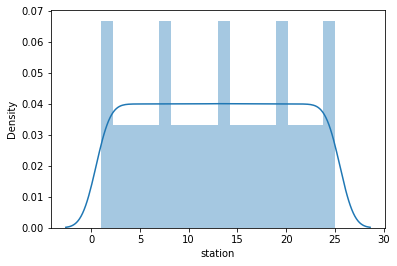

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


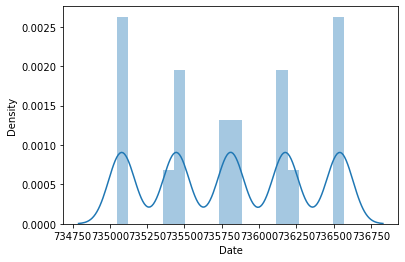

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


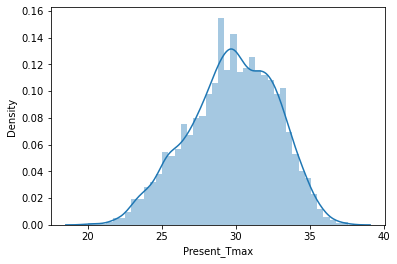

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


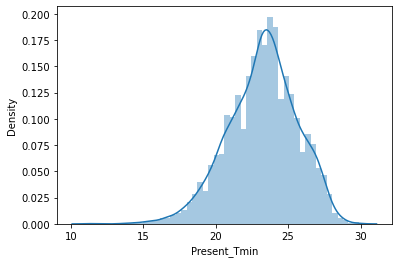

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


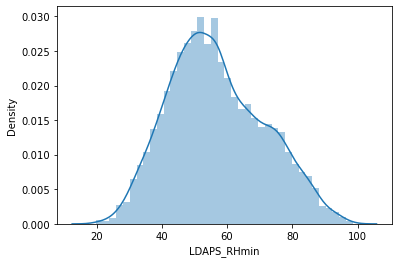

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


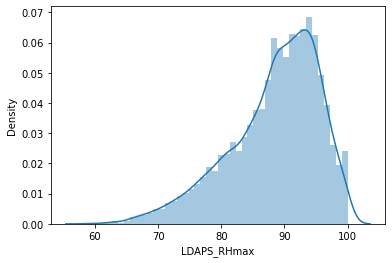

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


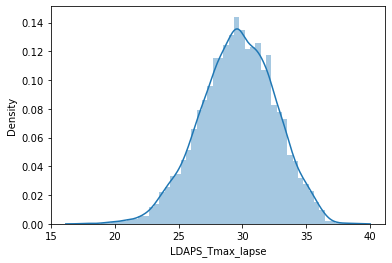

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


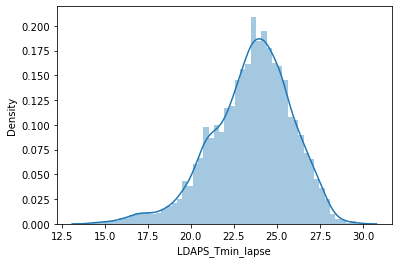

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


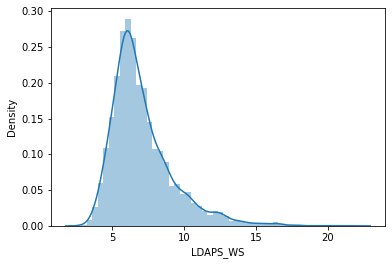

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


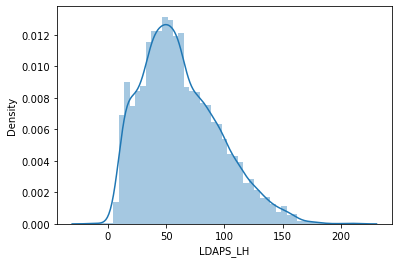

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


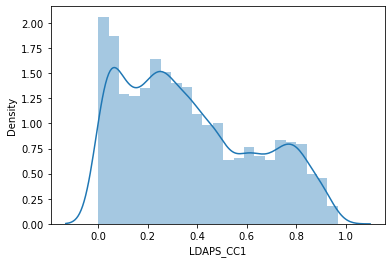

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


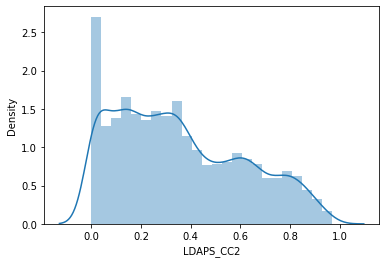

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


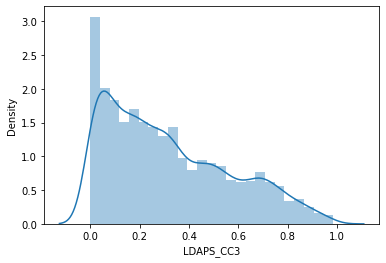

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


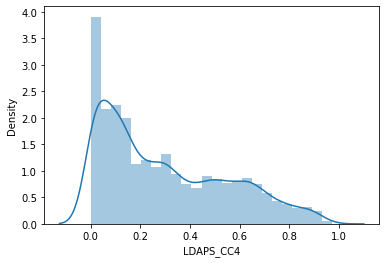

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


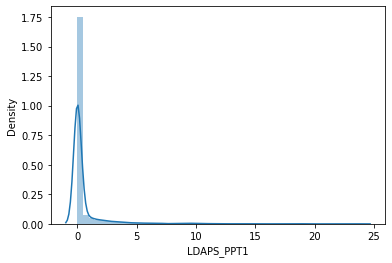

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


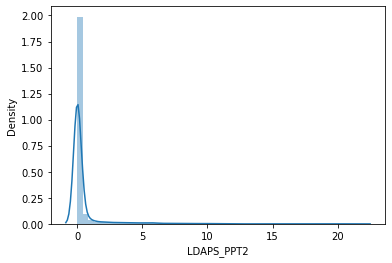

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


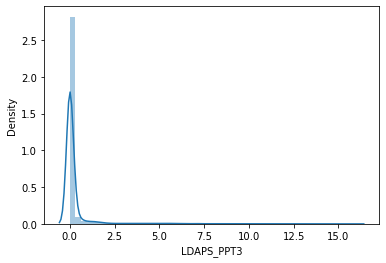

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


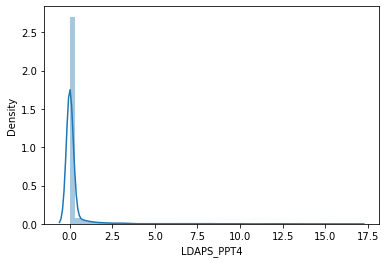

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


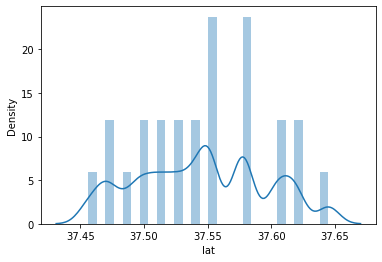

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


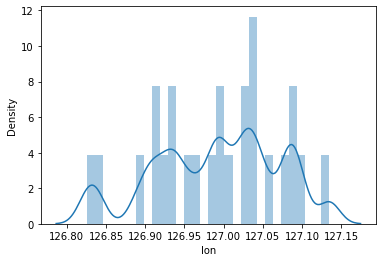

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


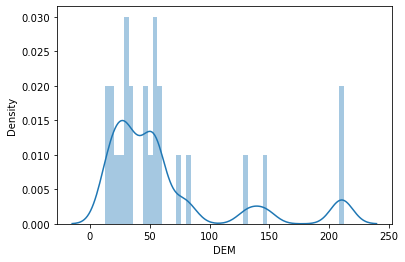

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


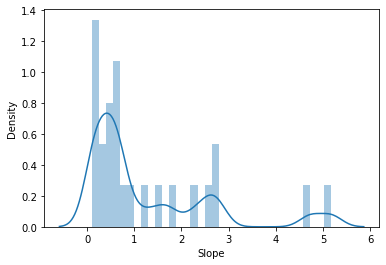

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


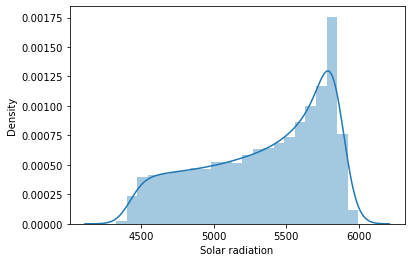

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


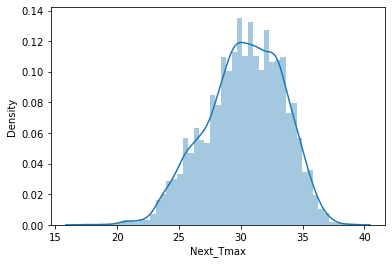

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


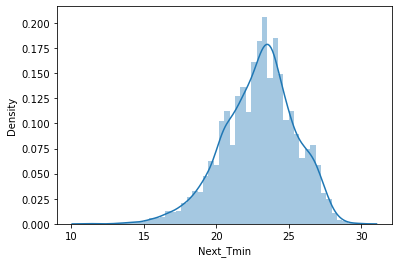

In [128]:
for column in data_df.columns:
    sns.distplot(data_df[column])
    plt.show()

We can observe that columns "station", "Date", "lat", "lon", "DEM", "Slope" have categorical data therefore we will use label Encoder to transform the data in these columns. 

#### Note that column Date has categorical data between range of values

We can also see that there are many columns with skewed distribution of data so we will normalize these columns.

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


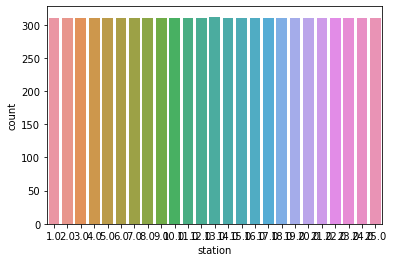

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


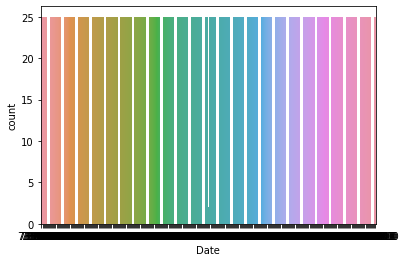

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


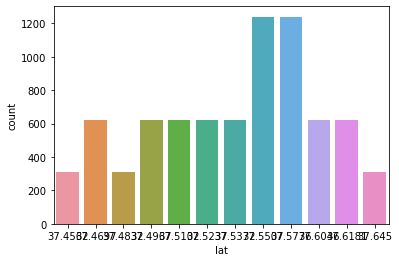

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


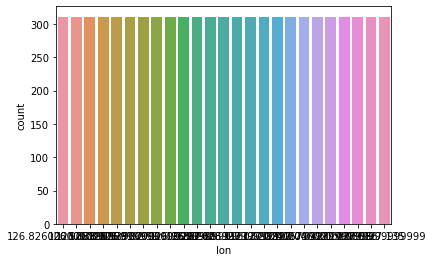

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


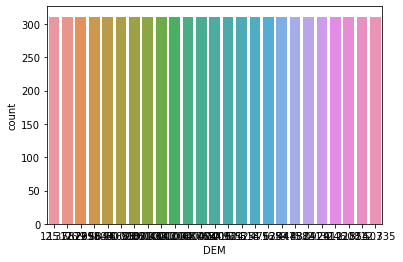

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


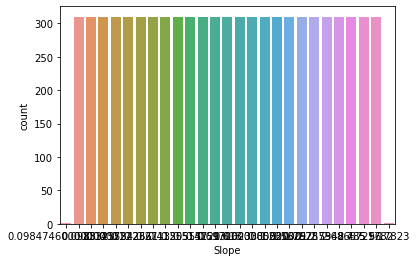

In [136]:
categorical_columns = ["station", "Date", "lat", "lon", "DEM", "Slope"]
for column in categorical_columns:
    sns.countplot(data_df[column])
    plt.show()

We see some class imbalance in column "lat" which can be treated to increase model accuracy.

### Outliers and Range Evaluation

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


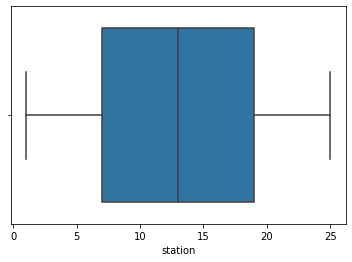

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


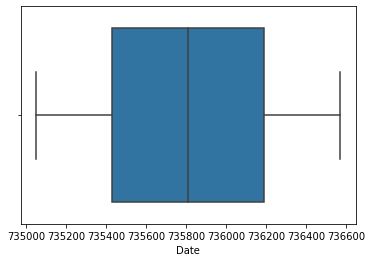

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


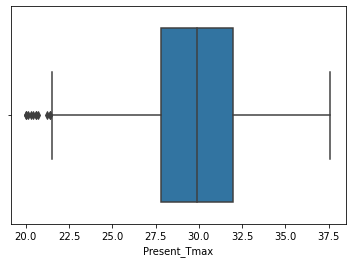

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


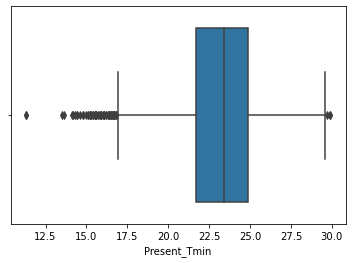

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


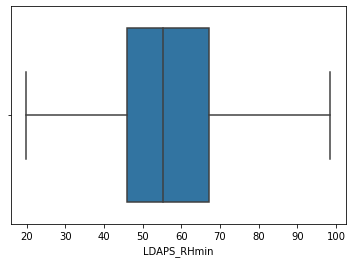

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


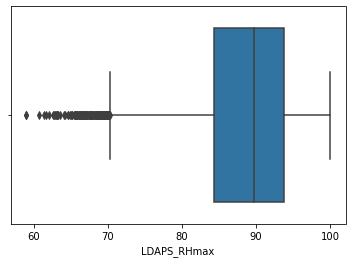

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


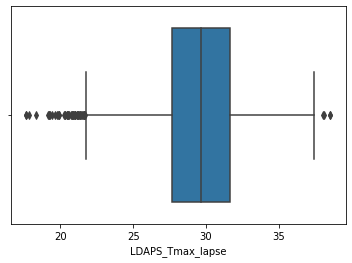

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


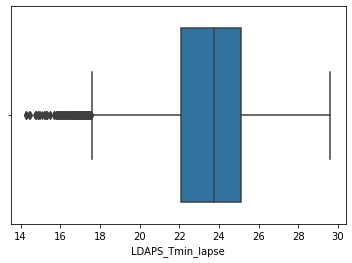

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


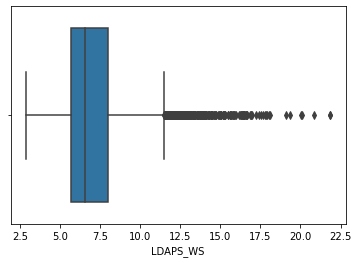

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


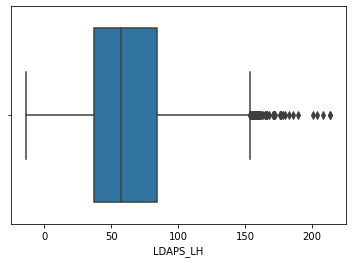

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


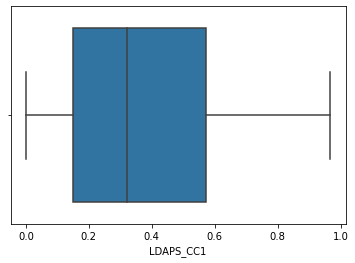

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


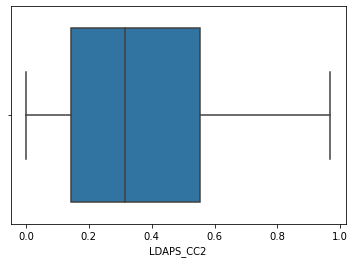

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


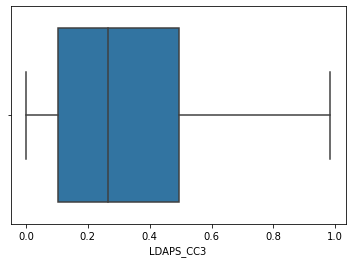

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


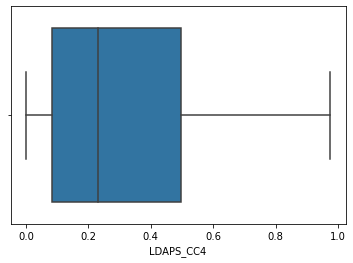

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


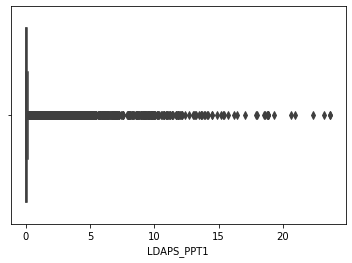

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


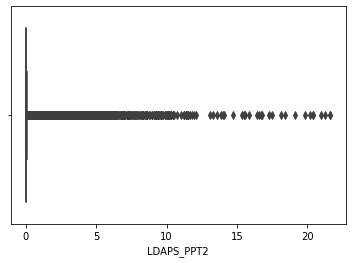

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


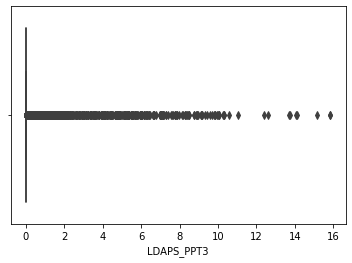

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


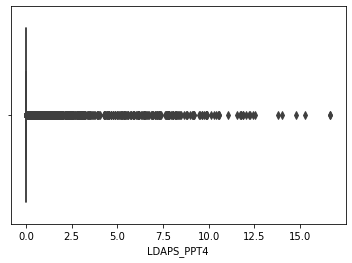

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


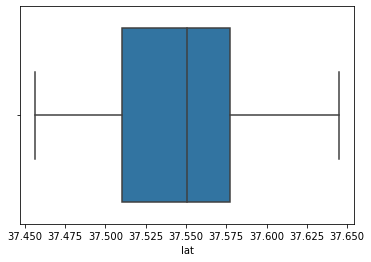

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


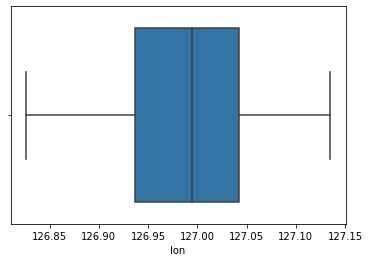

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


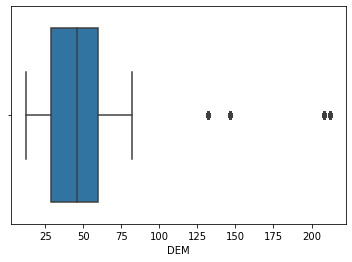

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


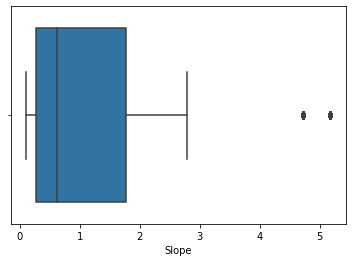

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


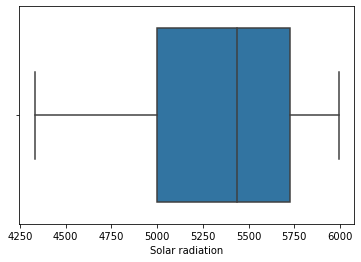

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


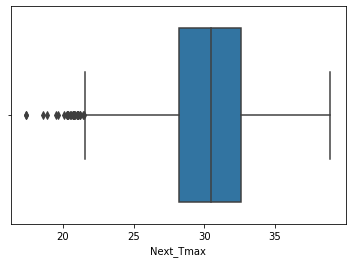

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


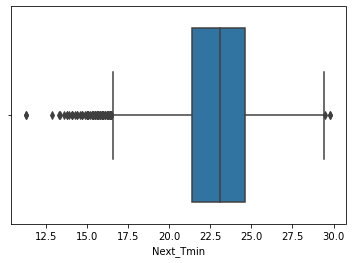

In [140]:
for column in data_df.columns:
    sns.boxplot(data_df[column])
    plt.show()

### Using Zscore to remove outliers

In [152]:
new_data = data_df.copy()
for column in data_df.columns:
    zscore = stats.zscore(new_data[column])
    for i in range(len(zscore)):
        if abs(zscore[i])>3:
            new_data = new_data.drop(i)
    new_data=new_data.reset_index(drop=True)
new_data

station      Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0         1.0  735049.0          28.7          21.4    58.255688    91.116364   
1         2.0  735049.0          31.9          21.6    52.263397    90.604721   
2         3.0  735049.0          31.6          23.3    48.690479    83.973587   
3         4.0  735049.0          32.0          23.4    58.239788    96.483688   
4         5.0  735049.0          31.4          21.9    56.174095    90.155128   
...       ...       ...           ...           ...          ...          ...   
6758     21.0  736571.0          23.1          17.8    24.688997    78.261383   
6759     22.0  736571.0          22.5          17.4    30.094858    83.690018   
6760     23.0  736571.0          23.3          17.1    26.741310    78.869858   
6761     24.0  736571.0          23.3          17.7    24.040634    77.294975   
6762     25.0  736571.0          23.2          17.4    22.933014    77.243744   

      LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  ...  \
0            28.074101         23.006936  6.818887   69.451805  ...   
1            29.850689         24.035009  5.691890   51.937448  ...   
2            30.091292         24.565633  6.138224   20.573050  ...   
3            29.704629         23.326177  5.650050   65.727144  ...   
4            29.113934         23.486480  5.735004  107.965535  ...   
...                ...               ...       ...         ...  ...   
6758         27.812697         18.303014  6.603253    9.614074  ...   
6759         26.704905         17.814038  5.768083   82.146707  ...   
6760         26.352081         18.775678  6.148918   72.058294  ...   
6761         27.010193         18.733519  6.542819   47.241457  ...   
6762         27.939516         18.522965  7.289264    9.090034  ...   

      LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM   Slope  \
0            0.0         0.0         0.0  37.6046  126.991  212.3350  2.7850   
1            0.0         0.0         0.0  37.6046  127.032   44.7624  0.5141   
2            0.0         0.0         0.0  37.5776  127.058   33.3068  0.2661   
3            0.0         0.0         0.0  37.6450  127.022   45.7160  2.5348   
4            0.0         0.0         0.0  37.5507  127.135   35.0380  0.5055   
...          ...         ...         ...      ...      ...       ...     ...   
6758         0.0         0.0         0.0  37.5507  127.040   26.2980  0.5721   
6759         0.0         0.0         0.0  37.5102  127.086   21.9668  0.1332   
6760         0.0         0.0         0.0  37.5372  126.891   15.5876  0.1554   
6761         0.0         0.0         0.0  37.5237  126.909   17.2956  0.2223   
6762         0.0         0.0         0.0  37.5237  126.970   19.5844  0.2713   

      Solar radiation  Next_Tmax  Next_Tmin  
0         5992.895996       29.1       21.2  
1         5869.312500       30.5       22.5  
2         5863.555664       31.1       23.9  
3         5856.964844       31.7       24.3  
4         5859.552246       31.2       22.5  
...               ...        ...        ...  
6758      4456.024414       27.6       17.7  
6759      4441.803711       28.0       17.1  
6760      4443.313965       28.3       18.1  
6761      4438.373535       28.6       18.8  
6762      4451.345215       27.8       17.4  

[6763 rows x 25 columns]

In [153]:
(len(data)-len(new_data))/len(data)*100

12.757997936016514

Since, we loose more than 12 percent data using zscore and our threshold is 8 percent data loss, we cannot use this method to remove the outliers. Instead we will check with Inter Quartile Range

### Using Interquartile range to remove outliers

In [174]:
new_data = data_df.copy()
for column in data_df.columns:
    percentile25 = new_data[column].quantile(0.1)
    percentile75 = new_data[column].quantile(0.9)
    new_data = data_df[data_df[column].between(percentile25, percentile75)]

#    print(new_data[np.where(new_data[column] < percentile25,
#                               percentile25,
#                               np.where(new_data[column] > percentile75,
#                                        percentile75,
#                                        new_data[column]))])
new_data

station      Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0         1.0  735049.0          28.7          21.4    58.255688    91.116364   
1         2.0  735049.0          31.9          21.6    52.263397    90.604721   
2         3.0  735049.0          31.6          23.3    48.690479    83.973587   
3         4.0  735049.0          32.0          23.4    58.239788    96.483688   
4         5.0  735049.0          31.4          21.9    56.174095    90.155128   
...       ...       ...           ...           ...          ...          ...   
7645     21.0  736567.0          28.8          20.8    37.032383    72.922852   
7647     23.0  736567.0          30.6          20.5    43.143810    73.104225   
7648     24.0  736567.0          30.0          21.4    40.617268    72.240135   
7649     25.0  736567.0          29.3          20.8    35.768570    73.089195   
7682      8.0  736569.0          26.3          18.1    29.959215    90.116638   

      LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  ...  \
0            28.074101         23.006936  6.818887   69.451805  ...   
1            29.850689         24.035009  5.691890   51.937448  ...   
2            30.091292         24.565633  6.138224   20.573050  ...   
3            29.704629         23.326177  5.650050   65.727144  ...   
4            29.113934         23.486480  5.735004  107.965535  ...   
...                ...               ...       ...         ...  ...   
7645         27.349863         19.597967  5.202856   10.082613  ...   
7647         25.756426         20.257920  5.446670   69.620525  ...   
7648         26.293516         20.328441  5.694517   47.209006  ...   
7649         27.358369         20.178119  5.725574    8.612653  ...   
7682         23.135079         17.282587  9.292264   75.430868  ...   

      LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM   Slope  \
0            0.0         0.0         0.0  37.6046  126.991  212.3350  2.7850   
1            0.0         0.0         0.0  37.6046  127.032   44.7624  0.5141   
2            0.0         0.0         0.0  37.5776  127.058   33.3068  0.2661   
3            0.0         0.0         0.0  37.6450  127.022   45.7160  2.5348   
4            0.0         0.0         0.0  37.5507  127.135   35.0380  0.5055   
...          ...         ...         ...      ...      ...       ...     ...   
7645         0.0         0.0         0.0  37.5507  127.040   26.2980  0.5721   
7647         0.0         0.0         0.0  37.5372  126.891   15.5876  0.1554   
7648         0.0         0.0         0.0  37.5237  126.909   17.2956  0.2223   
7649         0.0         0.0         0.0  37.5237  126.970   19.5844  0.2713   
7682         0.0         0.0         0.0  37.4697  126.910   52.5180  1.5629   

      Solar radiation  Next_Tmax  Next_Tmin  
0         5992.895996  29.100000   21.20000  
1         5869.312500  30.500000   22.50000  
2         5863.555664  31.100000   23.90000  
3         5856.964844  31.700000   24.30000  
4         5859.552246  31.200000   22.50000  
...               ...        ...        ...  
7645      4611.688965  26.700000   20.50000  
7647      4599.294922  27.100000   20.90000  
7648      4594.645020  28.000000   21.50000  
7649      4607.025879  27.200000   20.60000  
7682      4518.488770  30.274887   22.93222  

[5878 rows x 25 columns]

In [175]:
(len(data)-len(new_data))/len(data)*100

24.174406604747162

Since, we loose more than 24 percent data using zscore and our threshold is 8 percent data loss, we cannot use this method to remove the outliers.

## Bivariate Analysis

For Target column "Next_Tmax"

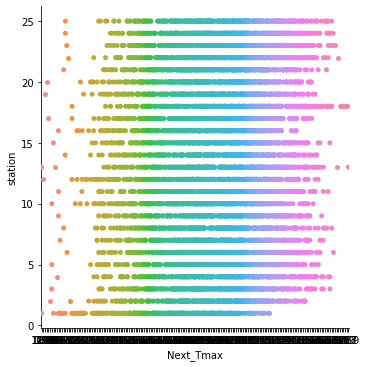

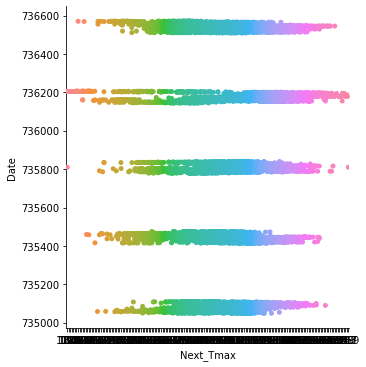

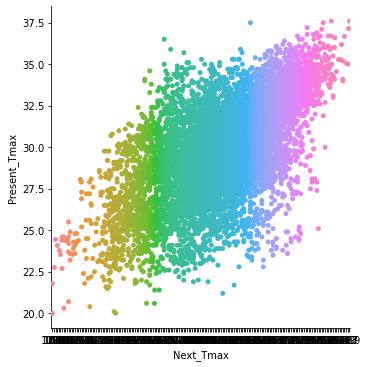

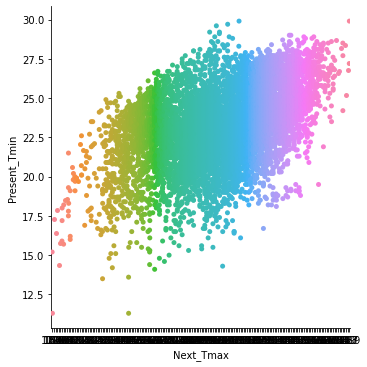

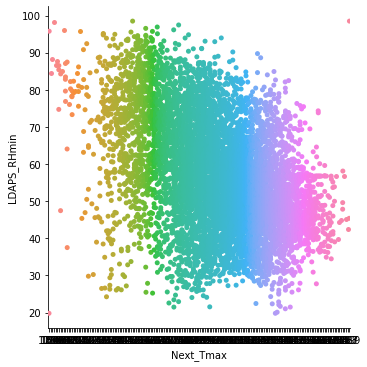

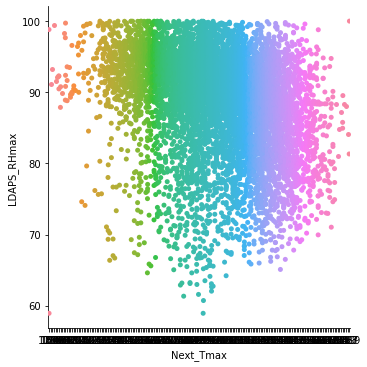

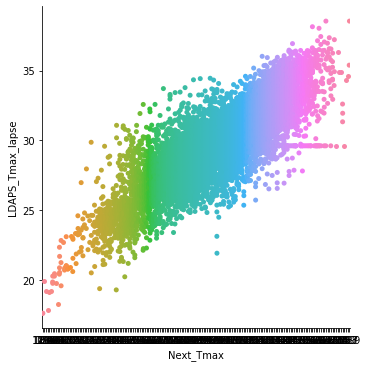

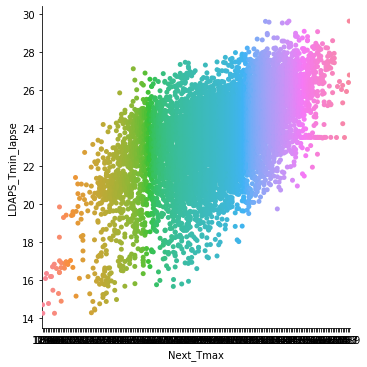

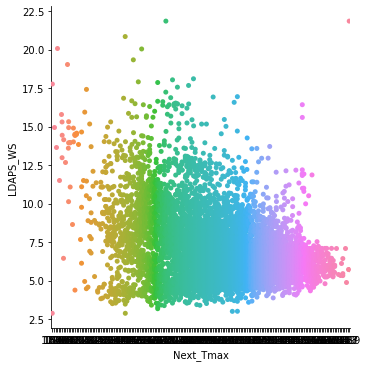

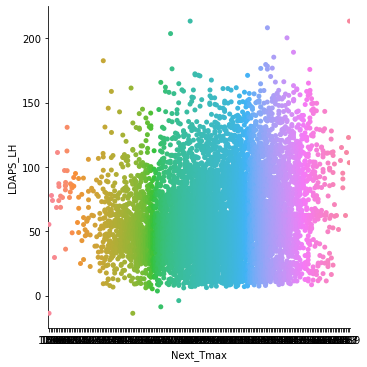

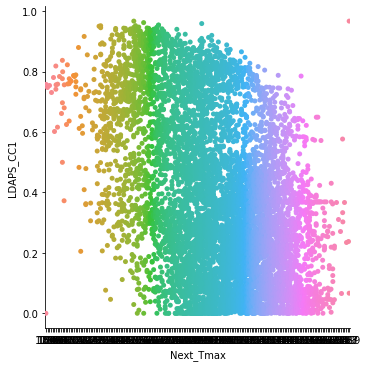

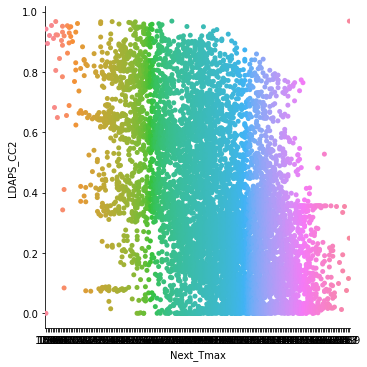

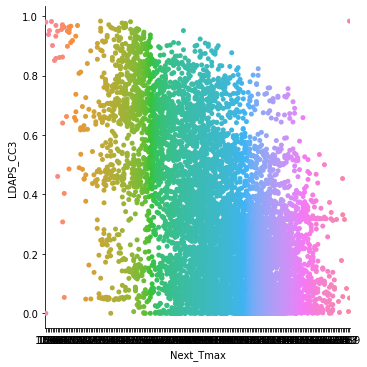

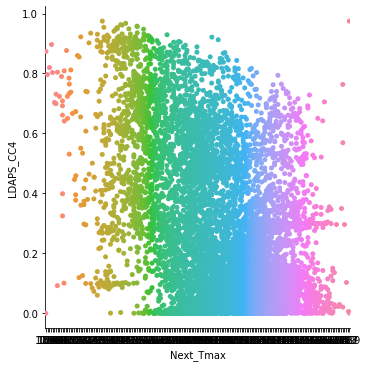

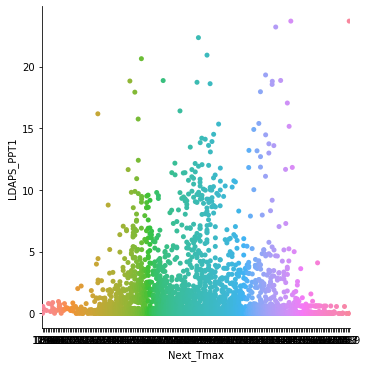

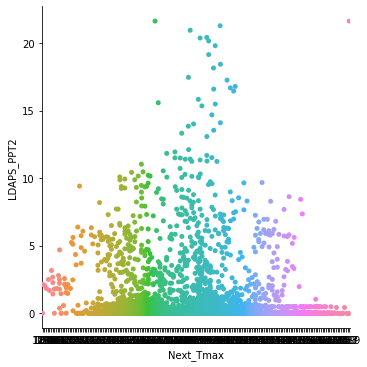

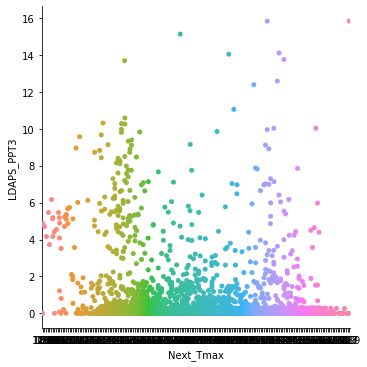

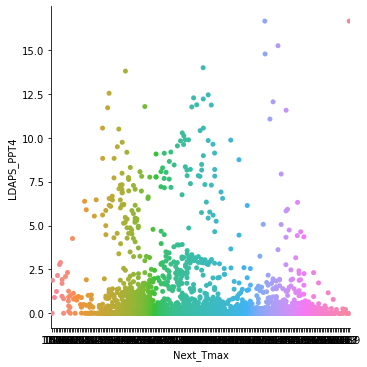

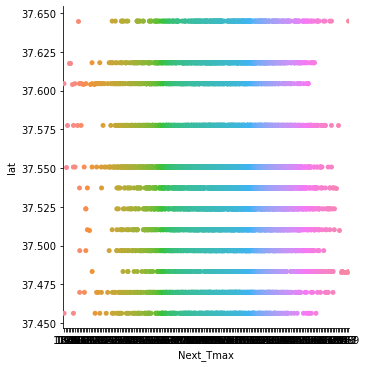

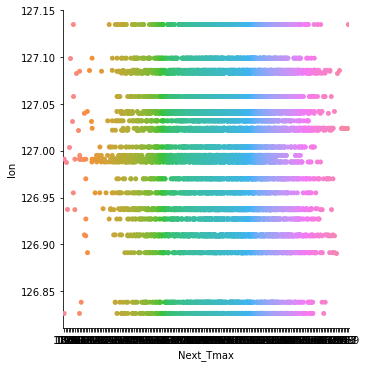

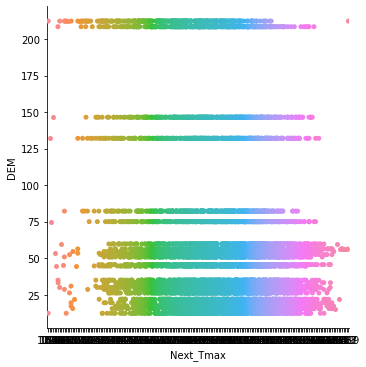

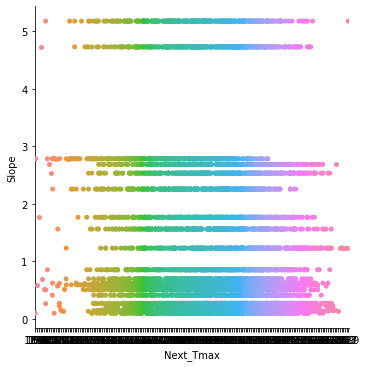

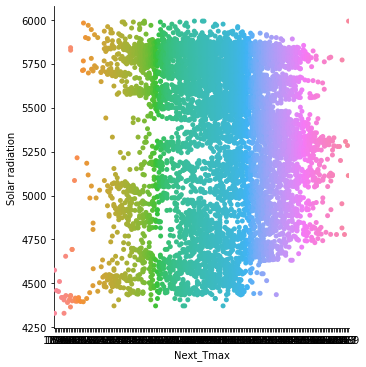

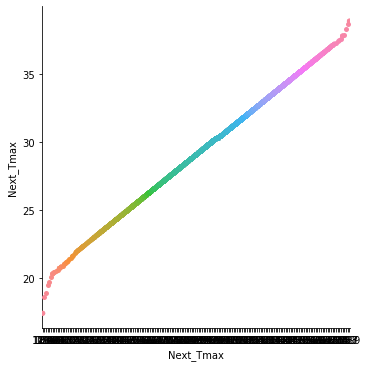

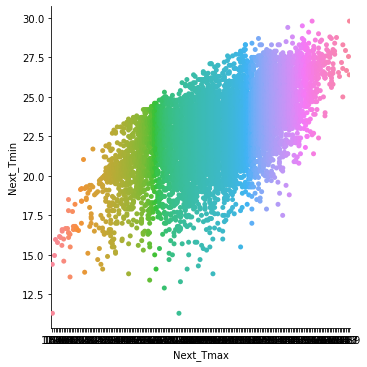

In [145]:
for column in data_df.columns:
    sns.catplot(x="Next_Tmax", y=column, data=data_df)
    plt.show()

Observations:

- Categorical Columns other than date and station have a lot of outliers.
- In LDAPS_PPT columns we can see high variance as the value of LDAPS column incleases the count of values decreases.
- In columns station and Date we can see uniform distribution.
- In column Present_Tmax, Present_Tmin, LDAPS_Tmax_lapse, LDAPS_Tmin_lapse, and Next_Tmax we can see linear graph. The features are directly proportional
- IN LDAPS_CC columns we see a inverse proportionality.

For Target column "Next_Tmin"

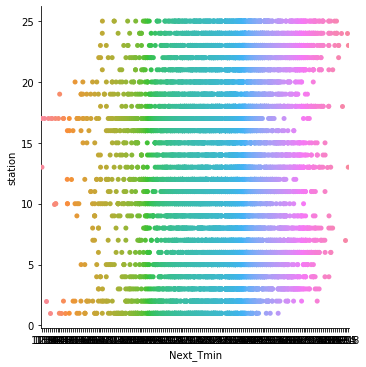

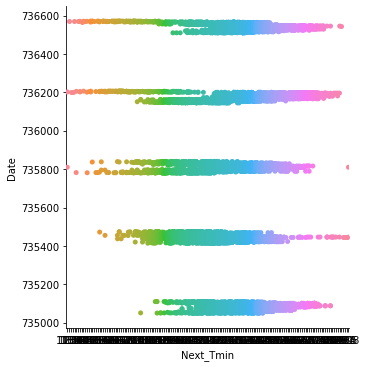

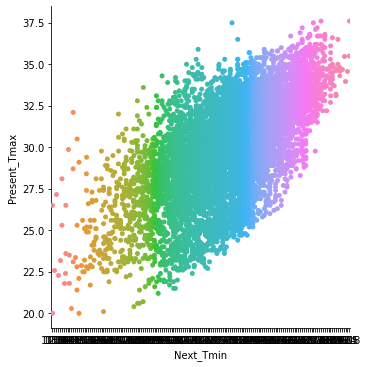

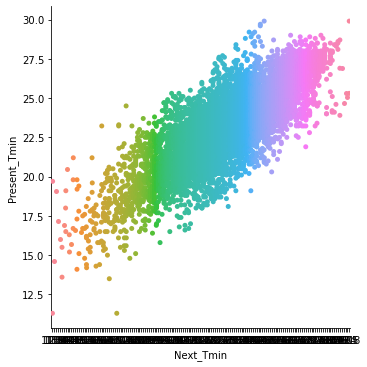

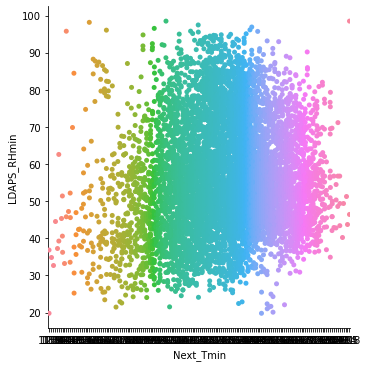

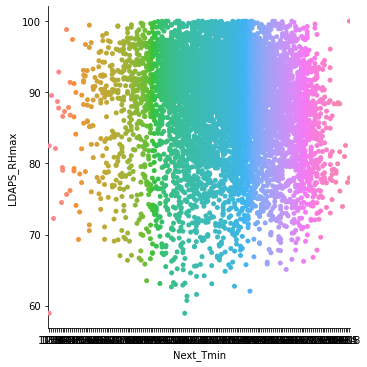

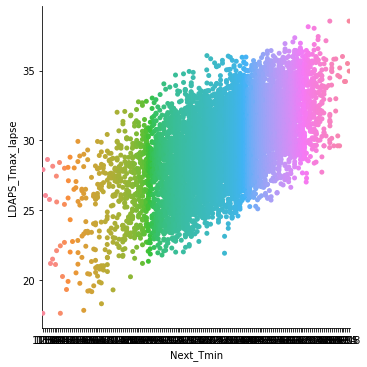

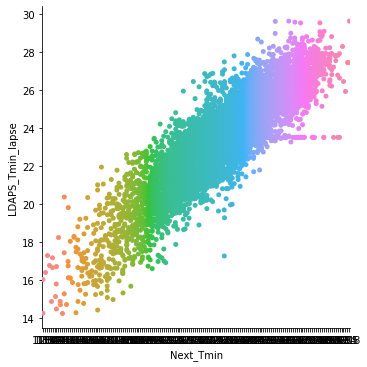

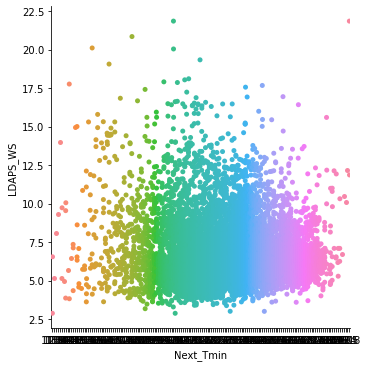

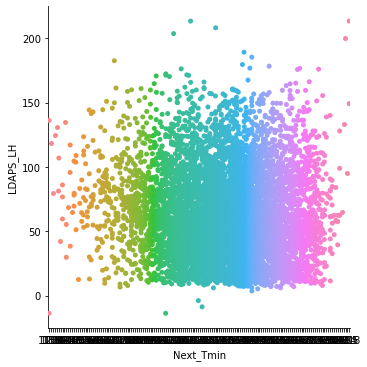

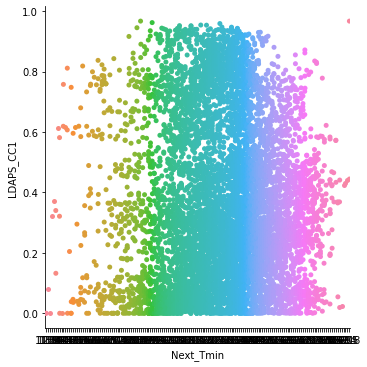

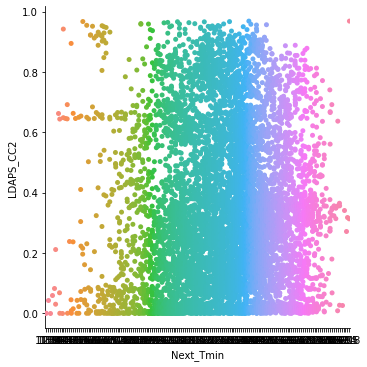

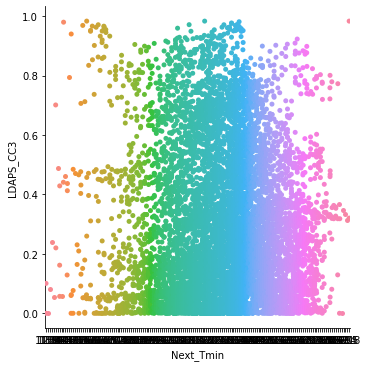

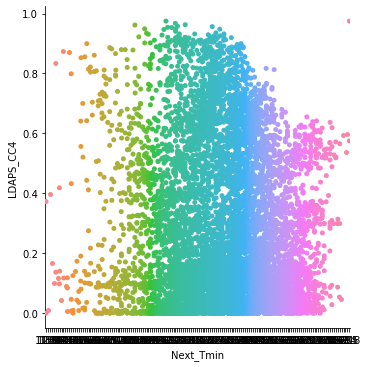

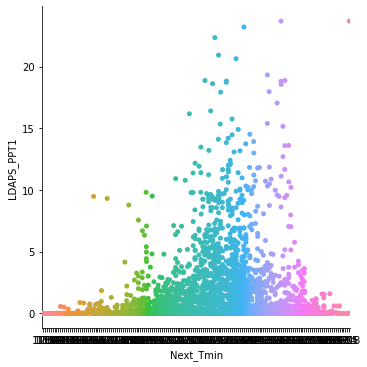

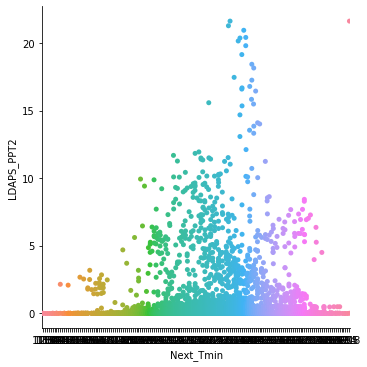

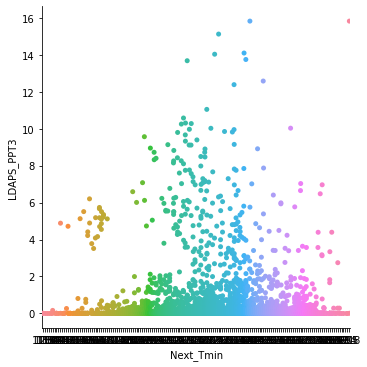

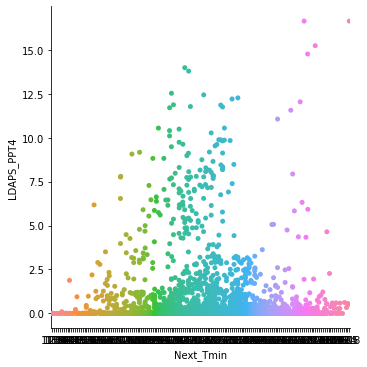

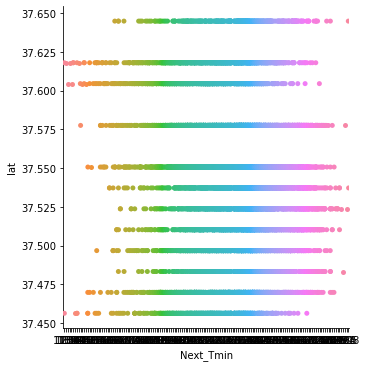

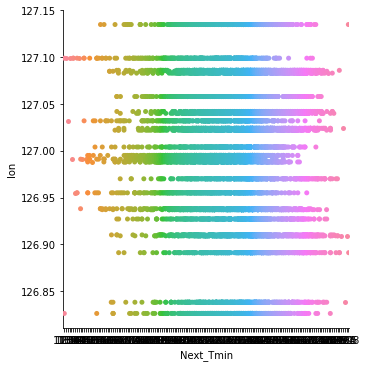

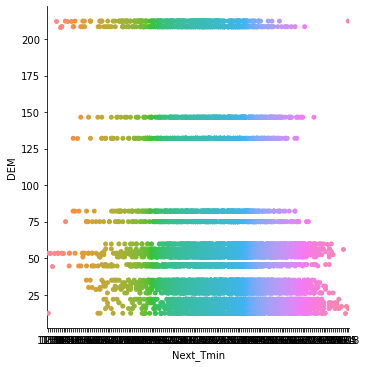

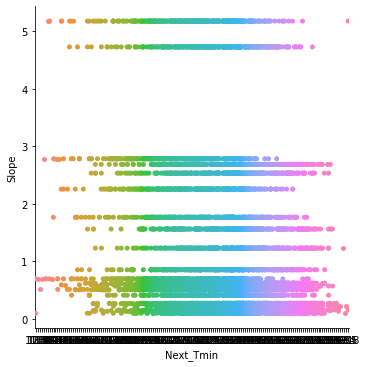

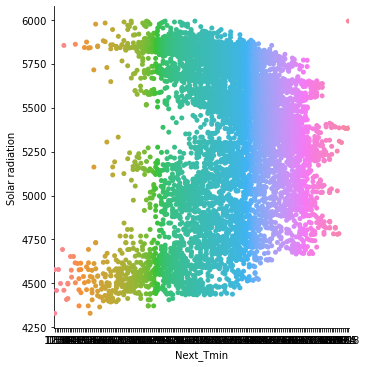

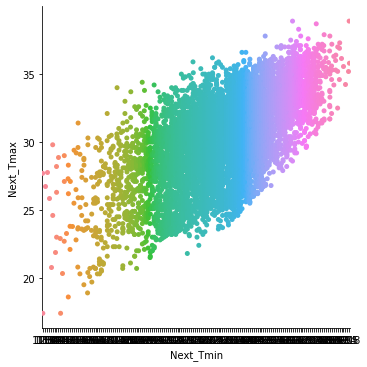

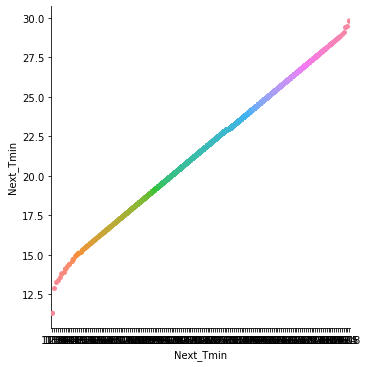

In [148]:
for column in data_df.columns:
    sns.catplot(x="Next_Tmin", y=column, data=data_df)
    plt.show()

Observations:

- Categorical Columns other than date and station have a lot of outliers.
- In LDAPS_PPT columns we can see high variance as the value of LDAPS_PPT column incleases the count of values decreases.
- In columns station and Date we can see uniform distribution.
- In column Present_Tmax, Present_Tmin, LDAPS_Tmax_lapse, LDAPS_Tmin_lapse, and Next_Tmax we can see linear graph. The features are directly proportional
- IN LDAPS_CC columns we see a inverse proportionality.

## Label Encoder

In [179]:
le = LabelEncoder()

In [186]:
data_le = data_df.copy()
categorical_columns1 = ['station', 'lat', 'lon', 'DEM', 'Slope']
for column in categorical_columns:
    data_le[column] = le.fit_transform(data_le[column])
data_le

station      Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0           0  735049.0          28.7          21.4    58.255688    91.116364   
1           1  735049.0          31.9          21.6    52.263397    90.604721   
2           2  735049.0          31.6          23.3    48.690479    83.973587   
3           3  735049.0          32.0          23.4    58.239788    96.483688   
4           4  735049.0          31.4          21.9    56.174095    90.155128   
...       ...       ...           ...           ...          ...          ...   
7747       22  736571.0          23.3          17.1    26.741310    78.869858   
7748       23  736571.0          23.3          17.7    24.040634    77.294975   
7749       24  736571.0          23.2          17.4    22.933014    77.243744   
7750       12  735809.9          20.0          11.3    19.794666    58.936283   
7751       12  735809.9          37.6          29.9    98.524734   100.000153   

      LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  ...  \
0            28.074101         23.006936   6.818887   69.451805  ...   
1            29.850689         24.035009   5.691890   51.937448  ...   
2            30.091292         24.565633   6.138224   20.573050  ...   
3            29.704629         23.326177   5.650050   65.727144  ...   
4            29.113934         23.486480   5.735004  107.965535  ...   
...                ...               ...        ...         ...  ...   
7747         26.352081         18.775678   6.148918   72.058294  ...   
7748         27.010193         18.733519   6.542819   47.241457  ...   
7749         27.939516         18.522965   7.289264    9.090034  ...   
7750         17.624954         14.272646   2.882580  -13.603212  ...   
7751         38.542255         29.619342  21.857621  213.414006  ...   

      LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4  lat  lon  DEM  Slope  \
0       0.000000    0.000000    0.000000    9   11   24     23   
1       0.000000    0.000000    0.000000    9   16   11     10   
2       0.000000    0.000000    0.000000    8   19    9      6   
3       0.000000    0.000000    0.000000   11   14   12     21   
4       0.000000    0.000000    0.000000    7   24   10      9   
...          ...         ...         ...  ...  ...  ...    ...   
7747    0.000000    0.000000    0.000000    6    2    1      4   
7748    0.000000    0.000000    0.000000    5    3    2      5   
7749    0.000000    0.000000    0.000000    5    9    3      7   
7750    0.000000    0.000000    0.000000    0    0    0      0   
7751   21.621661   15.841235   16.655469   11   24   24     26   

      Solar radiation  Next_Tmax  Next_Tmin  
0         5992.895996       29.1       21.2  
1         5869.312500       30.5       22.5  
2         5863.555664       31.1       23.9  
3         5856.964844       31.7       24.3  
4         5859.552246       31.2       22.5  
...               ...        ...        ...  
7747      4443.313965       28.3       18.1  
7748      4438.373535       28.6       18.8  
7749      4451.345215       27.8       17.4  
7750      4329.520508       17.4       11.3  
7751      5992.895996       38.9       29.8  

[7752 rows x 25 columns]

Note that we didn't encode date column since we will group the data by range of value and then encode accordingly. The Date column can be grouped in 5 categories according to the range of it's values which are defined within an interval of 200.

In [187]:
min_date = data_le["Date"].min()
max_date = data_le["Date"].max()    

In [190]:
range_list = [[min_date,735200],
              [735200,735600],
              [735600,736000],
              [736000,736400],
              [736400,max_date],
             ]

In [191]:
for i in range(len(data_le["Date"])):
    for j in range(len(range_list)):
        if range_list[j][0]<=data_le["Date"][i] and range_list[j][1]>=data_le["Date"][i]:
            data_le["Date"][i] = j
            break
data_le

<ipython-input-191-5697649c3513>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_le["Date"][i] = j


station  Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0           0   0.0          28.7          21.4    58.255688    91.116364   
1           1   0.0          31.9          21.6    52.263397    90.604721   
2           2   0.0          31.6          23.3    48.690479    83.973587   
3           3   0.0          32.0          23.4    58.239788    96.483688   
4           4   0.0          31.4          21.9    56.174095    90.155128   
...       ...   ...           ...           ...          ...          ...   
7747       22   4.0          23.3          17.1    26.741310    78.869858   
7748       23   4.0          23.3          17.7    24.040634    77.294975   
7749       24   4.0          23.2          17.4    22.933014    77.243744   
7750       12   2.0          20.0          11.3    19.794666    58.936283   
7751       12   2.0          37.6          29.9    98.524734   100.000153   

      LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  ...  \
0            28.074101         23.006936   6.818887   69.451805  ...   
1            29.850689         24.035009   5.691890   51.937448  ...   
2            30.091292         24.565633   6.138224   20.573050  ...   
3            29.704629         23.326177   5.650050   65.727144  ...   
4            29.113934         23.486480   5.735004  107.965535  ...   
...                ...               ...        ...         ...  ...   
7747         26.352081         18.775678   6.148918   72.058294  ...   
7748         27.010193         18.733519   6.542819   47.241457  ...   
7749         27.939516         18.522965   7.289264    9.090034  ...   
7750         17.624954         14.272646   2.882580  -13.603212  ...   
7751         38.542255         29.619342  21.857621  213.414006  ...   

      LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4  lat  lon  DEM  Slope  \
0       0.000000    0.000000    0.000000    9   11   24     23   
1       0.000000    0.000000    0.000000    9   16   11     10   
2       0.000000    0.000000    0.000000    8   19    9      6   
3       0.000000    0.000000    0.000000   11   14   12     21   
4       0.000000    0.000000    0.000000    7   24   10      9   
...          ...         ...         ...  ...  ...  ...    ...   
7747    0.000000    0.000000    0.000000    6    2    1      4   
7748    0.000000    0.000000    0.000000    5    3    2      5   
7749    0.000000    0.000000    0.000000    5    9    3      7   
7750    0.000000    0.000000    0.000000    0    0    0      0   
7751   21.621661   15.841235   16.655469   11   24   24     26   

      Solar radiation  Next_Tmax  Next_Tmin  
0         5992.895996       29.1       21.2  
1         5869.312500       30.5       22.5  
2         5863.555664       31.1       23.9  
3         5856.964844       31.7       24.3  
4         5859.552246       31.2       22.5  
...               ...        ...        ...  
7747      4443.313965       28.3       18.1  
7748      4438.373535       28.6       18.8  
7749      4451.345215       27.8       17.4  
7750      4329.520508       17.4       11.3  
7751      5992.895996       38.9       29.8  

[7752 rows x 25 columns]

## Scaling continuous data features using Min_Max Scaler

In [198]:
data_le.describe()

station         Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
count  7752.000000  7752.000000   7752.000000   7752.000000  7752.000000   
mean     12.000000     2.000000     29.768211     23.225059    56.759372   
std       7.210637     1.414122      2.956557      2.403036    14.596973   
min       0.000000     0.000000     20.000000     11.300000    19.794666   
25%       6.000000     1.000000     27.800000     21.700000    46.046162   
50%      12.000000     2.000000     29.900000     23.400000    55.313244   
75%      18.000000     3.000000     32.000000     24.900000    67.038254   
max      24.000000     4.000000     37.600000     29.900000    98.524734   

       LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse     LDAPS_WS  \
count  7752.000000       7752.000000       7752.000000  7752.000000   
mean     88.374804         29.613447         23.512589     7.097875   
std       7.157124          2.932898          2.333973     2.173245   
min      58.936283         17.624954         14.272646     2.882580   
25%      84.316923         27.693091         22.114651     5.686487   
50%      89.699505         29.662273         23.735942     6.563068   
75%      93.704500         31.683819         25.134000     8.007471   
max     100.000153         38.542255         29.619342    21.857621   

          LDAPS_LH  ...   LDAPS_PPT2   LDAPS_PPT3   LDAPS_PPT4          lat  \
count  7752.000000  ...  7752.000000  7752.000000  7752.000000  7752.000000   
mean     62.505019  ...     0.485003     0.278200     0.269407     5.959881   
std      33.567001  ...     1.754258     1.156174     1.200364     3.000850   
min     -13.603212  ...     0.000000     0.000000     0.000000     0.000000   
25%      37.532764  ...     0.000000     0.000000     0.000000     4.000000   
50%      57.310630  ...     0.000000     0.000000     0.000000     7.000000   
75%      83.904586  ...     0.024276     0.009697     0.000693     8.000000   
max     213.414006  ...    21.621661    15.841235    16.655469    11.000000   

               lon          DEM        Slope  Solar radiation    Next_Tmax  \
count  7752.000000  7752.000000  7752.000000      7752.000000  7752.000000   
mean     12.000000    12.000000    13.000000      5341.502803    30.274887   
std       7.213213     7.213213     7.213661       429.158867     3.122557   
min       0.000000     0.000000     0.000000      4329.520508    17.400000   
25%       6.000000     6.000000     7.000000      4999.018555    28.200000   
50%      12.000000    12.000000    13.000000      5436.345215    30.500000   
75%      18.000000    18.000000    19.000000      5728.316406    32.600000   
max      24.000000    24.000000    26.000000      5992.895996    38.900000   

         Next_Tmin  
count  7752.000000  
mean     22.932220  
std       2.483276  
min      11.300000  
25%      21.400000  
50%      23.100000  
75%      24.600000  
max      29.800000  

[8 rows x 25 columns]

In [200]:
scaler = MinMaxScaler()

In [207]:
categorical_columns = ['station', 'Date','lat', 'lon', 'DEM', 'Slope']
data_sca = data_le.copy()
for column in data_sca.columns:
    if column not in categorical_columns:
        data_sca[column] = scaler.fit_transform(data_sca[[column]])
data_sca

station  Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0           0   0.0      0.494318      0.543011     0.488518     0.783659   
1           1   0.0      0.676136      0.553763     0.412406     0.771200   
2           2   0.0      0.659091      0.645161     0.367024     0.609716   
3           3   0.0      0.681818      0.650538     0.488316     0.914366   
4           4   0.0      0.647727      0.569892     0.462078     0.760251   
...       ...   ...           ...           ...          ...          ...   
7747       22   4.0      0.187500      0.311828     0.088234     0.485429   
7748       23   4.0      0.187500      0.344086     0.053931     0.447077   
7749       24   4.0      0.181818      0.327957     0.039862     0.445829   
7750       12   2.0      0.000000      0.000000     0.000000     0.000000   
7751       12   2.0      1.000000      1.000000     1.000000     1.000000   

      LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  ...  LDAPS_PPT2  \
0             0.499546          0.569132  0.207447  0.365853  ...         0.0   
1             0.584480          0.636121  0.148053  0.288703  ...         0.0   
2             0.595982          0.670697  0.171575  0.150545  ...         0.0   
3             0.577497          0.589934  0.145848  0.349446  ...         0.0   
4             0.549257          0.600379  0.150325  0.535505  ...         0.0   
...                ...               ...       ...       ...  ...         ...   
7747          0.417221          0.293420  0.172139  0.377335  ...         0.0   
7748          0.448683          0.290673  0.192898  0.268018  ...         0.0   
7749          0.493112          0.276953  0.232236  0.099963  ...         0.0   
7750          0.000000          0.000000  0.000000  0.000000  ...         0.0   
7751          1.000000          1.000000  1.000000  1.000000  ...         1.0   

      LDAPS_PPT3  LDAPS_PPT4  lat  lon  DEM  Slope  Solar radiation  \
0            0.0         0.0    9   11   24     23         1.000000   
1            0.0         0.0    9   16   11     10         0.925703   
2            0.0         0.0    8   19    9      6         0.922242   
3            0.0         0.0   11   14   12     21         0.918280   
4            0.0         0.0    7   24   10      9         0.919835   
...          ...         ...  ...  ...  ...    ...              ...   
7747         0.0         0.0    6    2    1      4         0.068411   
7748         0.0         0.0    5    3    2      5         0.065441   
7749         0.0         0.0    5    9    3      7         0.073239   
7750         0.0         0.0    0    0    0      0         0.000000   
7751         1.0         1.0   11   24   24     26         1.000000   

      Next_Tmax  Next_Tmin  
0      0.544186   0.535135  
1      0.609302   0.605405  
2      0.637209   0.681081  
3      0.665116   0.702703  
4      0.641860   0.605405  
...         ...        ...  
7747   0.506977   0.367568  
7748   0.520930   0.405405  
7749   0.483721   0.329730  
7750   0.000000   0.000000  
7751   1.000000   1.000000  

[7752 rows x 25 columns]

### Heat Map

In [258]:
corr_matrix = data_sca.corr()
corr_matrix

station          Date  Present_Tmax  Present_Tmin  \
station           1.000000  0.000000e+00      0.112655      0.131646   
Date              0.000000  1.000000e+00      0.059800      0.037396   
Present_Tmax      0.112655  5.980007e-02      1.000000      0.618760   
Present_Tmin      0.131646  3.739568e-02      0.618760      1.000000   
LDAPS_RHmin      -0.066733 -2.044507e-03     -0.204571      0.123143   
LDAPS_RHmax      -0.166984 -1.418320e-01     -0.301787     -0.015140   
LDAPS_Tmax_lapse  0.069107  1.617217e-02      0.570129      0.464151   
LDAPS_Tmin_lapse  0.104758 -4.693413e-03      0.623496      0.762993   
LDAPS_WS          0.005277 -1.113577e-01     -0.121820     -0.034675   
LDAPS_LH         -0.133357  5.707733e-02      0.135463     -0.009258   
LDAPS_CC1         0.006919 -6.647797e-02     -0.311805      0.084447   
LDAPS_CC2         0.003396 -4.325621e-02     -0.213791      0.090263   
LDAPS_CC3         0.000694  1.104803e-01     -0.144018     -0.002772   
LDAPS_CC4         0.006126  1.042110e-01     -0.140729     -0.044335   
LDAPS_PPT1       -0.002709 -8.897835e-02     -0.109006      0.112845   
LDAPS_PPT2       -0.008250 -4.287282e-02     -0.099449      0.068176   
LDAPS_PPT3       -0.012461  4.717314e-02     -0.120367     -0.046126   
LDAPS_PPT4       -0.010401  3.797336e-02     -0.099607     -0.062965   
lat              -0.182987 -5.400590e-20     -0.041052     -0.057148   
lon              -0.150715  0.000000e+00      0.014546     -0.038448   
DEM              -0.295279  0.000000e+00     -0.135273     -0.232760   
Slope            -0.118412  0.000000e+00     -0.107437     -0.173291   
Solar radiation  -0.019001 -7.728597e-03     -0.025439      0.053578   
Next_Tmax         0.107983  5.999540e-02      0.610348      0.471806   
Next_Tmin         0.128293  2.313633e-02      0.622741      0.796670   

                  LDAPS_RHmin  LDAPS_RHmax  LDAPS_Tmax_lapse  \
station             -0.066733    -0.166984          0.069107   
Date                -0.002045    -0.141832          0.016172   
Present_Tmax        -0.204571    -0.301787          0.570129   
Present_Tmin         0.123143    -0.015140          0.464151   
LDAPS_RHmin          1.000000     0.579141         -0.564580   
LDAPS_RHmax          0.579141     1.000000         -0.373404   
LDAPS_Tmax_lapse    -0.564580    -0.373404          1.000000   
LDAPS_Tmin_lapse     0.089476    -0.114143          0.654021   
LDAPS_WS             0.294361     0.135333         -0.311996   
LDAPS_LH            -0.070858     0.238579          0.048010   
LDAPS_CC1            0.613818     0.436652         -0.438439   
LDAPS_CC2            0.745443     0.391330         -0.523619   
LDAPS_CC3            0.689679     0.226957         -0.541327   
LDAPS_CC4            0.514075     0.130619         -0.429539   
LDAPS_PPT1           0.262665     0.268449         -0.111065   
LDAPS_PPT2           0.390967     0.229050         -0.242122   
LDAPS_PPT3           0.240642     0.134607         -0.188115   
LDAPS_PPT4           0.168595     0.117853         -0.160273   
lat                  0.063961     0.152792         -0.019547   
lon                 -0.066084     0.044610          0.086883   
DEM                  0.070971     0.171486         -0.129849   
Slope                0.071969     0.165905         -0.107400   
Solar radiation      0.244080     0.149261          0.047971   
Next_Tmax           -0.437898    -0.283738          0.827189   
Next_Tmin            0.095019    -0.071997          0.586868   

                  LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  ...  LDAPS_PPT2  \
station                   0.104758  0.005277 -0.133357  ...   -0.008250   
Date                     -0.004693 -0.111358  0.057077  ...   -0.042873   
Present_Tmax              0.623496 -0.121820  0.135463  ...   -0.099449   
Present_Tmin              0.762993 -0.034675 -0.009258  ...    0.068176   
LDAPS_RHmin               0.089476  0.294361 -0.070858  ...    0.390967   
LDAPS_RHmax              -0.114

<AxesSubplot:>

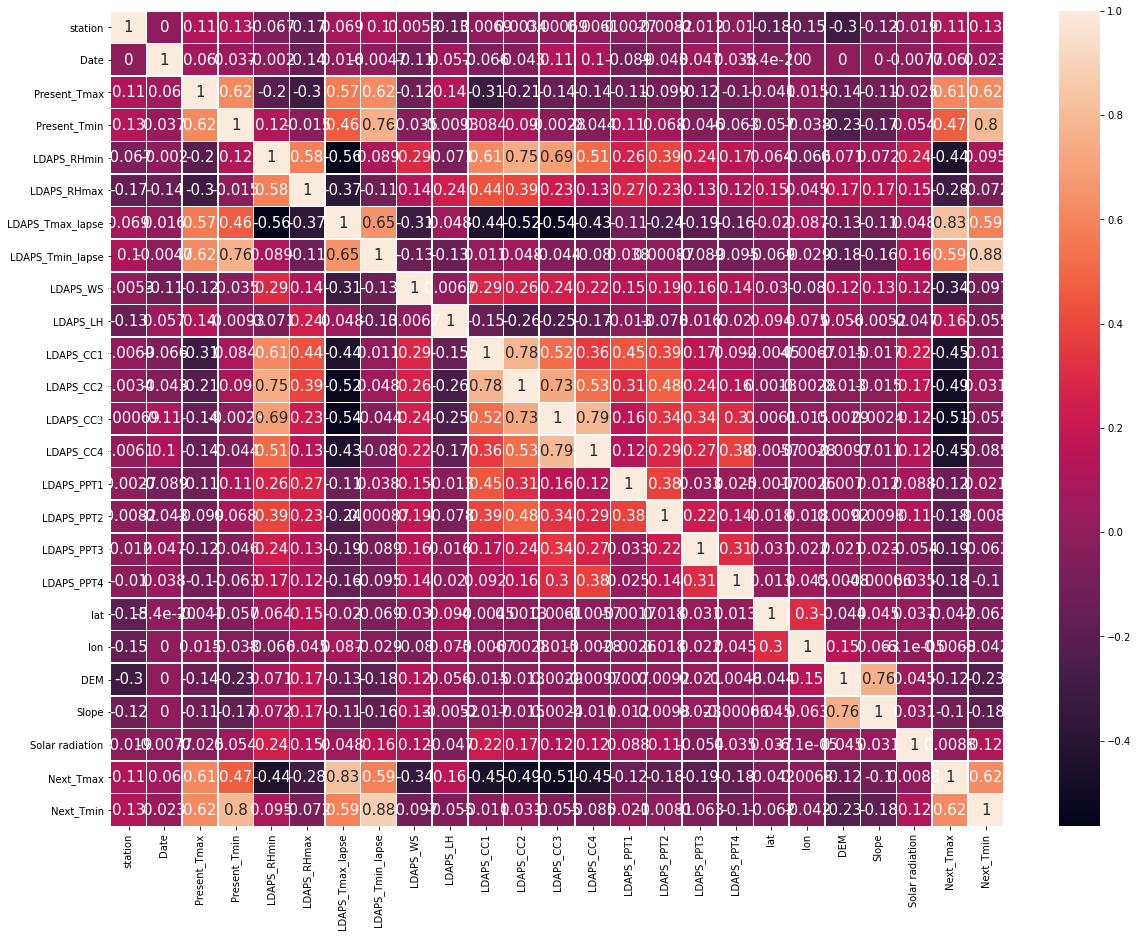

In [259]:
plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix,annot=True,linewidths=.5,annot_kws={'size': 15})

We can see multicolinearity in our model for multiple columns therefore we will use PCA to solve this issue.

## PCA

In [353]:
pca = PCA()

X = data_sca.drop(["Next_Tmax","Next_Tmin",],axis=1)
X_features = X.columns
X = pca.fit_transform(X)
X

array([[-1.82267319e+01,  1.22611682e-01,  7.65563592e+00, ...,
         5.71239580e-03,  2.55631248e-03,  5.94100185e-02],
       [-2.14042582e+00,  1.02504668e+01,  6.58256137e+00, ...,
         2.97756259e-03,  1.40031432e-02,  4.56768108e-02],
       [ 1.42132886e+00,  1.36246857e+01,  4.79610391e+00, ...,
         6.24163956e-03,  1.83139820e-02,  5.02225674e-02],
       ...,
       [ 1.45146776e+01, -4.77283192e+00, -6.10455793e+00, ...,
         3.95177926e-03, -1.34570892e-02,  2.93119533e-02],
       [ 1.89019017e+01, -3.22242507e+00,  1.01271672e+01, ...,
         6.27316340e-02,  1.16941423e-02,  2.03678125e-01],
       [-1.88754539e+01,  3.08794378e+00, -1.00996949e+01, ...,
         3.12138728e-01,  1.09588492e-01, -4.58731445e-02]])

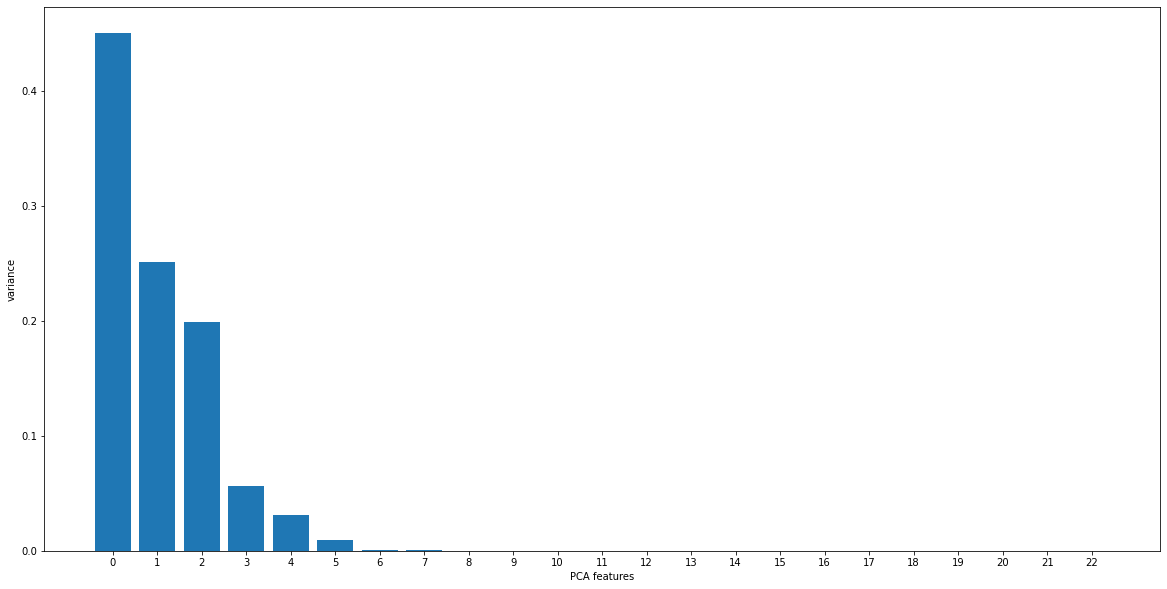

In [354]:
features = range(pca.n_components_)
plt.figure(figsize=(20,10))
plt.bar(features,pca.explained_variance_ratio_)
plt.xticks(features)
plt.xlabel("PCA features")
plt.ylabel("variance")
plt.show()

## Defining dataset for Next_Tmax Target

In [355]:
pca = PCA(n_components = 5)

X = data_sca.drop(["Next_Tmax","Next_Tmin","Present_Tmax","Present_Tmin","LDAPS_Tmax_lapse","LDAPS_Tmin_lapse","LDAPS_WS","LDAPS_PPT1","LDAPS_PPT2","LDAPS_PPT3","LDAPS_PPT4"],axis=1)
X_features = X.columns
X = pca.fit_transform(X)
X

array([[-18.22627079,   0.12262149,   7.65570489,  -1.1585811 ,
         -2.47250787],
       [ -2.14071077,  10.25040057,   6.5826381 ,  -1.31015396,
         -1.24183766],
       [  1.42072077,  13.62466921,   4.79609988,   0.48084012,
         -0.50676204],
       ...,
       [ 14.51776423,  -4.77239945,  -6.106216  ,  -0.36930894,
          0.19713993],
       [ 18.90794134,  -3.2211556 ,  10.12374832,   2.65047074,
          3.91300945],
       [-18.87841279,   3.08752039, -10.09693986,  -2.24353096,
         -3.09677622]])

In [356]:
data_pca = pd.DataFrame(X,columns=["PCA"+str(x) for x in range(0,5)])
data_pca["Target"] = data_le["Next_Tmax"]
data_pca

PCA0       PCA1       PCA2      PCA3      PCA4  Target
0    -18.226271   0.122621   7.655705 -1.158581 -2.472508    29.1
1     -2.140711  10.250401   6.582638 -1.310154 -1.241838    30.5
2      1.420721  13.624669   4.796100  0.480840 -0.506762    31.1
3     -8.625043   3.952930   4.200860 -8.127574 -0.848140    31.7
4     -1.485698  15.000351  -0.311549  0.051465  1.330080    31.2
...         ...        ...        ...       ...       ...     ...
7747  18.521803  -7.479930   0.244953 -0.625811 -1.602625    28.3
7748  17.383236  -7.905686  -1.315405 -0.021841 -0.751150    28.6
7749  14.517764  -4.772399  -6.106216 -0.369309  0.197140    27.8
7750  18.907941  -3.221156  10.123748  2.650471  3.913009    17.4
7751 -18.878413   3.087520 -10.096940 -2.243531 -3.096776    38.9

[7752 rows x 6 columns]

In [357]:
corr_matrix = data_pca.corr()
corr_matrix

PCA0          PCA1          PCA2          PCA3          PCA4  \
PCA0    1.000000e+00  3.874777e-16  8.410145e-17  5.946966e-17 -5.004729e-17   
PCA1    3.874777e-16  1.000000e+00 -1.254737e-16  4.024146e-16 -2.651420e-16   
PCA2    8.410145e-17 -1.254737e-16  1.000000e+00 -2.280498e-16 -3.692196e-17   
PCA3    5.946966e-17  4.024146e-16 -2.280498e-16  1.000000e+00  4.435200e-16   
PCA4   -5.004729e-17 -2.651420e-16 -3.692196e-17  4.435200e-16  1.000000e+00   
Target  1.320548e-01  5.392890e-03 -7.126073e-02  5.742344e-03  4.293717e-02   

          Target  
PCA0    0.132055  
PCA1    0.005393  
PCA2   -0.071261  
PCA3    0.005742  
PCA4    0.042937  
Target  1.000000

<AxesSubplot:>

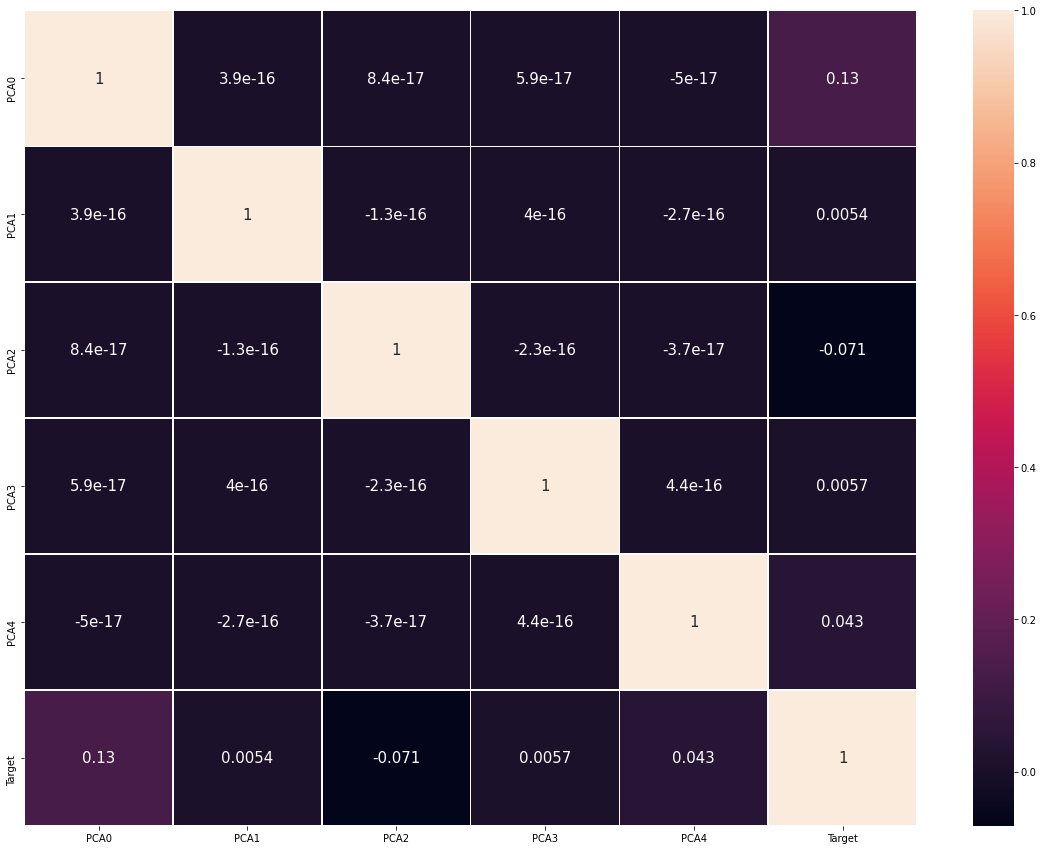

In [358]:
plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix,annot=True,linewidths=.5,annot_kws={'size': 15})

In [359]:
data_sca.skew()

station             0.000000
Date                0.000000
Present_Tmax       -0.264137
Present_Tmin       -0.367538
LDAPS_RHmin         0.300220
LDAPS_RHmax        -0.855015
LDAPS_Tmax_lapse   -0.227880
LDAPS_Tmin_lapse   -0.581763
LDAPS_WS            1.579236
LDAPS_LH            0.673757
LDAPS_CC1           0.459458
LDAPS_CC2           0.472350
LDAPS_CC3           0.640735
LDAPS_CC4           0.666482
LDAPS_PPT1          5.393821
LDAPS_PPT2          5.775355
LDAPS_PPT3          6.457129
LDAPS_PPT4          6.825464
lat                -0.343742
lon                 0.000000
DEM                 0.000000
Slope               0.000000
Solar radiation    -0.511210
Next_Tmax          -0.340200
Next_Tmin          -0.404447
dtype: float64

## Splitting Training and Testing Dataset

In [360]:
X=data_sca.drop(["Next_Tmax","Present_Tmax","Present_Tmin","LDAPS_Tmax_lapse","LDAPS_Tmin_lapse","LDAPS_WS","LDAPS_PPT1","LDAPS_PPT2","LDAPS_PPT3","LDAPS_PPT4"],axis=1)
y=data_sca["Next_Tmax"]


In [361]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2)

# Modelling data into Regression models

### Linear Regression

In [362]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [363]:
print(lr.score(X_train,y_train))
lr.score(X_test,y_test)

0.7170447776336206


0.7018718198493655

In [364]:
y_pred = lr.predict(X_test)
y_pred

array([0.65189386, 0.67722195, 0.62984324, ..., 0.65600045, 0.55704483,
       0.60632315])

In [365]:
r2_score(y_test, y_pred)

0.7018718198493655

In [366]:
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
rmse

0.07808936168594147

In [380]:
k_fold = KFold(n_splits=4, shuffle=True, random_state=42)

In [368]:
scores = cross_val_score(lr, X_train, y_train, scoring='r2', cv=k_fold)
scores

array([0.67379071, 0.75198532, 0.72187397, 0.72102319, 0.70959954,
       0.75801917, 0.6975854 , 0.66822437, 0.72004342, 0.7175024 ])

In [369]:
print(np.mean(scores),np.std(scores))

0.713964750753518 0.027462105747657495


### Decision Tree Regression

In [370]:
score_max = 0
index = 0
for i in range(100):
    X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=i)
    DTR = DecisionTreeRegressor()
    DTR.fit(X_train, y_train)
    r2 = DTR.score(X_test,y_test)
    if r2>score_max:
        score_max = r2
        index = i
print (score_max)
index

0.7871275634033387


42

In [383]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=index)

In [384]:
DTR = DecisionTreeRegressor()
DTR.fit(X_train, y_train)

DecisionTreeRegressor()

In [385]:
print(DTR.score(X_train,y_train))
DTR.score(X_test,y_test)

1.0


0.7870279154554025

In [386]:
y_pred = DTR.predict(X_test)
y_pred

array([0.46976744, 0.8       , 0.3627907 , ..., 0.46046512, 0.33953488,
       0.4372093 ])

In [390]:
r2_score(y_test, y_pred)

0.7870279154554025

In [391]:
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
rmse

0.06708117134207735

In [396]:
scores = cross_val_score(DTR, X_train, y_train, scoring='r2', cv=k_fold)
scores

array([0.71742263, 0.71678532, 0.72420794, 0.71612302])

In [397]:
print(np.mean(scores),np.std(scores))

0.7186347282189942 0.003250342069566977


### Random Forest Regressor

In [398]:
score_max = 0
index = 0
for i in range(100):
    X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=i)
    rfr = RandomForestRegressor()
    rfr.fit(X_train, y_train)
    r2 = rfr.score(X_test,y_test)
    if r2>score_max:
        score_max = r2
        index = i
print (score_max)
index

0.9038749618177347


79

In [399]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=index)

In [400]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [401]:
print(rfr.score(X_train,y_train))
rfr.score(X_test,y_test)

0.9846484519702333


0.9021949388151692

In [402]:
y_pred = rfr.predict(X_test)
y_pred

array([0.39223256, 0.35018605, 0.48766232, ..., 0.69874419, 0.68637209,
       0.42325581])

In [403]:
r2 = r2_score(y_test,y_pred)
r2

0.9021949388151692

In [404]:
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
rmse

0.044755021183857435

In [405]:
scores = cross_val_score(rfr, X_train, y_train, scoring='r2',cv=k_fold)
scores

array([0.88434086, 0.87809236, 0.87988613, 0.86232433])

In [406]:
print(np.mean(scores),np.std(scores))

0.8761609196930983 0.00830617589981989


### Support Vector Regression

In [408]:
score_max = 0
index = 0
for i in range(100):
    X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=i)
    svr = SVR()
    svr.fit(X_train, y_train)
    r2 = svr.score(X_test,y_test)
    if r2>score_max:
        score_max = r2
        index = i
print (score_max)
index

0.6335210998123026


40

In [409]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=index)

In [410]:
svr = SVR()
svr.fit(X_train, y_train)

SVR()

In [411]:
y_pred = svr.predict(X_test)
y_pred

array([0.62981981, 0.61018231, 0.7085435 , ..., 0.41676837, 0.59664152,
       0.59766683])

In [414]:
print(svr.score(X_train,y_train))
svr.score(X_test,y_test)

0.6056708589557653


0.6335210998123026

In [415]:
r2 = r2_score(y_pred,y_test)
r2

0.05821046057737578

In [416]:
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
rmse

0.08909185025104724

In [418]:
scores = cross_val_score(svr, X_train, y_train, scoring='r2', cv=k_fold)
scores

array([0.5672732 , 0.57388388, 0.57361261, 0.56493678])

In [419]:
print(np.mean(scores),np.std(scores))

0.5699266187253686 0.003911059586415312


### KNN Regression

In [422]:
score_max = 0
index = 0
for i in range(100):
    X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=i)
    knn = KNeighborsRegressor()
    knn.fit(X_train, y_train)
    r2 = knn.score(X_test,y_test)
    if r2>score_max:
        score_max = r2
        index = i
print (score_max)
index

0.5432280202263109


84

In [423]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=index)

In [427]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [428]:
y_pred = knn.predict(X_test)
y_pred

array([0.59348837, 0.69581395, 0.58046512, ..., 0.52      , 0.78790698,
       0.48186047])

In [429]:
print(knn.score(X_train,y_train))
knn.score(X_test,y_test)

0.6667061154970839


0.5432280202263109

In [430]:
r2 = r2_score(y_pred,y_test)
r2

0.18911961074041328

In [431]:
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
rmse

0.09863974822999517

In [433]:
scores = cross_val_score(knn, X_train, y_train, scoring='r2',cv=k_fold)
scores

array([0.41201163, 0.44652465, 0.49134452, 0.40285927])

In [434]:
print(np.mean(scores),np.std(scores))

0.43818501865561754 0.034743476686006206


From the above models we can find the highest accuracy among these models. From our observation we can see that Random Forest Regression model has the highest score relative to other models. Also, the difference between mean scores and standard deviation is highest for Random Forest Regressoion

# Using hyperparameters on Random Forest Regression model to improve accuracy.

In [435]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=79)

In [436]:
rfr.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [437]:
model_params = {'n_estimators': [20,40,60,80,100],
                'max_features': [5,7,9,11,13],
                'max_depth': [20,40,60,80,100],
                'random_state':[25,35,45,55,65,75,85]}

In [438]:
rfr = RandomForestRegressor()

In [439]:
k_fold = KFold(n_splits=4, shuffle=True, random_state=index)

In [ ]:
rfr_grid = GridSearchCV(estimator=rfr, param_grid=model_params, cv=k_fold)
rfr_grid.fit(X_train, y_train)
print(rfr_grid.best_estimator_)

In [ ]:
score_max = 0
index = 0
for i in range(100):
    X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=i)
    rfr_final.fit(X_train, y_train)
    score = rfr_final.score(X_test,y_test)
    if score>score_max:
        score_max = score
        index = i
print (score_max)
index

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=index)

In [ ]:
rfr_final.fit(X_train, y_train)

In [ ]:
y_pred = rfr_final.predict(X_test)
y_pred

In [ ]:
print(rfr_final.score(X_train,y_train))
rfr_final.score(X_test,y_test)

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
rmse

In [ ]:
scores = cross_val_score(rfr_final, X_train, y_train,cv=4)
scores

In [ ]:
print(np.mean(scores),np.std(scores))

# Saving the most efficient model in a pickle file# Saving the most efficient model in a pickle file

In [ ]:
import pickle

final_model1 = open('rfr_final_prediction.csv', 'ab')     
pickle.dump(rfr_final, final_model1)                     
final_model1.close() 